# Telecom Customer Churn Prediction with Logistic Regression

## Problem Context

**Customer Churn** refers to the imminent possibility of a client stop using a company's product or service. It is generally measured as a percentage of the customer base that leaves the company during a certain period of time (usually monthly).

A telecom company has hired us to create a prediction model in order to identify these customers and be able to create commercial strategies to retain them. It was requested the use of a **Logistic Regression** algorithm for being a simple and efficient model.

A dataset containing information about services purchased by different customers was provided by the company.

🕿 **Objectives**
* Import Dataset
* Analyse the type of data
* Explore data
* Treat any inconsistency
* Instantiate a model
* Create a proper score
* Evaluate and choose the best model

## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import scipy.stats as stats
from imblearn.under_sampling import NearMiss, CondensedNearestNeighbour
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import StratifiedKFold, cross_validate, cross_val_score, train_test_split
from sklearn import metrics
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, make_scorer, auc, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc, confusion_matrix, balanced_accuracy_score 
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from sklearn.model_selection import GridSearchCV
pd.set_option("display.max_columns", 100)

## Reading Dataset

In [2]:
# Training dataset:

df_train = pd.read_csv('projeto4_telecom_treino.csv', index_col = 0)
df_train.sample(5)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
193,KY,80,area_code_408,no,no,0,209.9,74,35.68,195.1,77,16.58,208.2,119,9.37,8.8,4,2.38,2,no
1712,ID,138,area_code_415,yes,yes,17,225.2,116,38.28,173.4,88,14.74,145.8,99,6.56,11.7,4,3.16,0,no
1983,SD,125,area_code_415,no,no,0,163.8,73,27.85,255.6,85,21.73,192.9,95,8.68,15.7,4,4.24,0,no
1409,NM,232,area_code_408,no,no,0,165.6,104,28.15,195.9,115,16.65,118.3,77,5.32,11.8,3,3.19,1,no
374,NY,32,area_code_415,no,no,0,164.8,98,28.02,229.9,96,19.54,167.3,108,7.53,14.8,2,4.00,2,no


In [3]:
# Dropping any duplicate value:

df_train.drop_duplicates(inplace = True)

## Analysing Dataset

In [4]:
# Training dataset dimension:

df_train.shape

(3333, 20)

In [5]:
# Training dataset type of data:

df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3333 entries, 1 to 3333
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          3333 non-null   object 
 1   account_length                 3333 non-null   int64  
 2   area_code                      3333 non-null   object 
 3   international_plan             3333 non-null   object 
 4   voice_mail_plan                3333 non-null   object 
 5   number_vmail_messages          3333 non-null   int64  
 6   total_day_minutes              3333 non-null   float64
 7   total_day_calls                3333 non-null   int64  
 8   total_day_charge               3333 non-null   float64
 9   total_eve_minutes              3333 non-null   float64
 10  total_eve_calls                3333 non-null   int64  
 11  total_eve_charge               3333 non-null   float64
 12  total_night_minutes            3333 non-null   f

In [6]:
df_train.isna().sum().sum()

0

* There isn't any **missing** or **null** value in the training dataset.

In [7]:
# Quick statistics:

df_train.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


Let's print the unique values for the categorical columns: 

In [8]:
cat_unique = ['state', 'area_code', 'international_plan', 'voice_mail_plan', 'number_customer_service_calls']

for column in cat_unique:
    
    print(f'{column}:\n')
    print(df_train[column].unique())
    print('\n')

state:

['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']


area_code:

['area_code_415' 'area_code_408' 'area_code_510']


international_plan:

['no' 'yes']


voice_mail_plan:

['yes' 'no']


number_customer_service_calls:

[1 0 2 3 4 5 7 9 6 8]




## Exploratory Analysis

Initially, we will create a function to plot a histogram and a boxplot for each numerical column in our dataset, so that we can verify any ocurrency of **outliers**.

In [9]:
def plot_outliers(column, label_x, title1, title2):

    plt.figure(figsize = (20,8))

    sns.set(style = 'darkgrid')

    ax0 = plt.subplot(121)
    ax0 = sns.histplot(x = column, color = 'royalblue', kde = False, bins = 20)
    ax0.set_title(title1, fontsize = 15, color = 'black')
    ax0.set_ylabel('Count', color = 'black', fontsize = 13)
    ax0.set_xlabel(label_x, color = 'black', fontsize = 13, labelpad = 15)

    ax1 = plt.subplot(122)
    ax1 = sns.boxplot(x = column, orient = 'h', color = 'royalblue')
    ax1.set_title(title2, fontsize = 15, color = 'black')
    ax1.set_xlabel(label_x, color = 'black', fontsize = 13, labelpad = 15)

    plt.show()

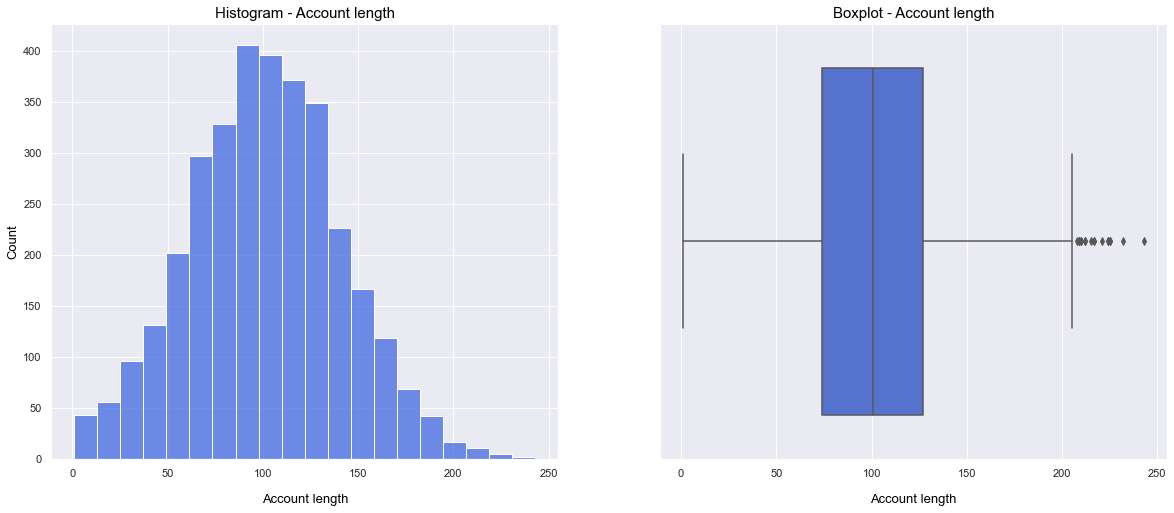



-------------------------------------------------------------------------------------------------------------------




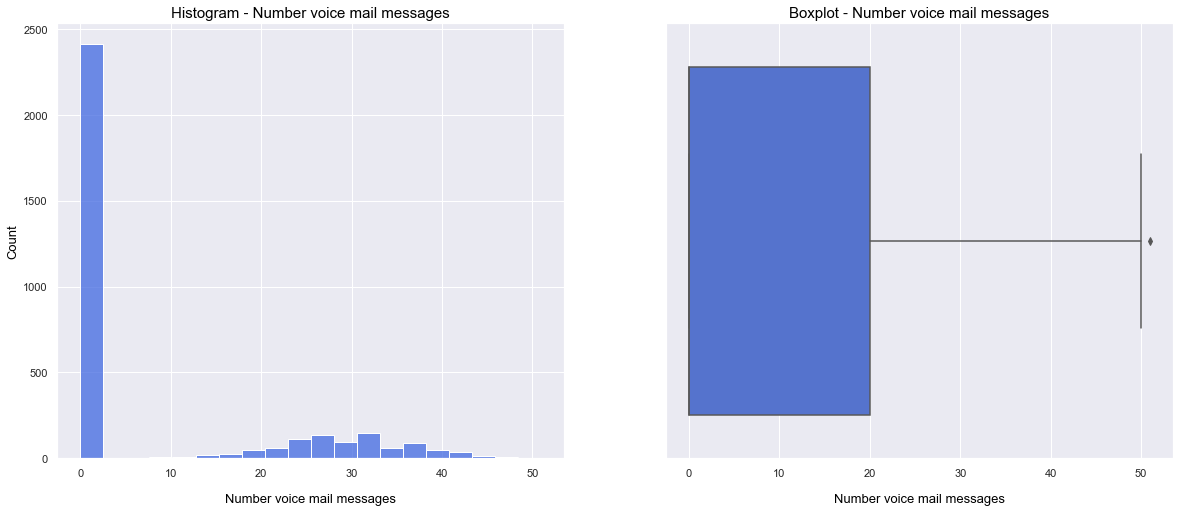



-------------------------------------------------------------------------------------------------------------------




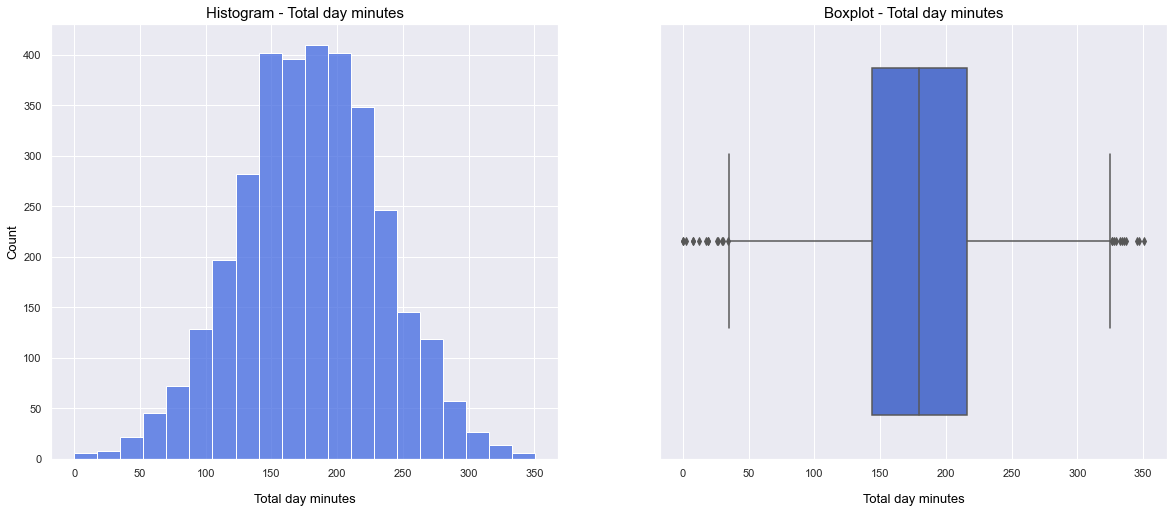



-------------------------------------------------------------------------------------------------------------------




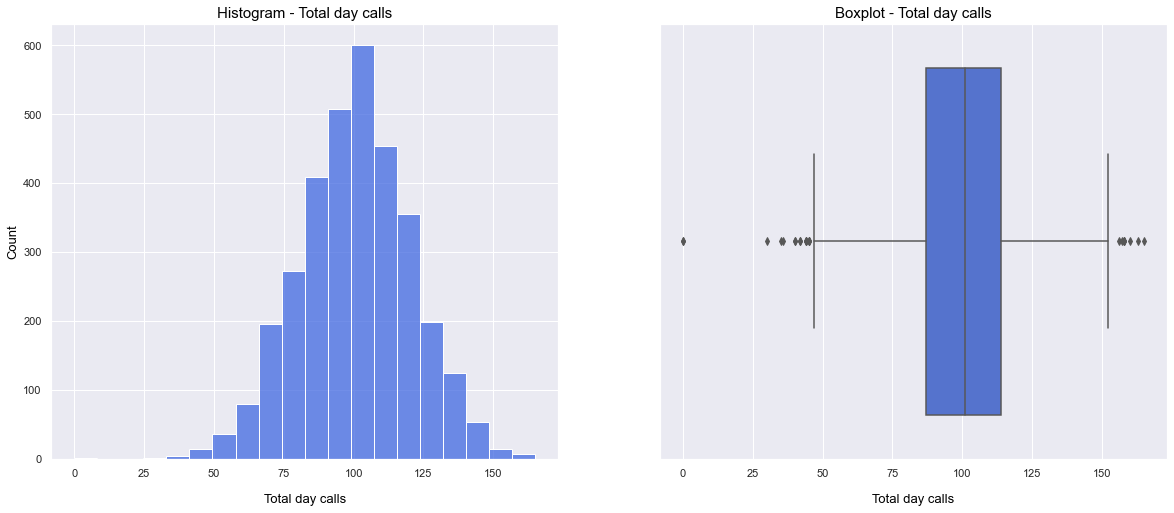



-------------------------------------------------------------------------------------------------------------------




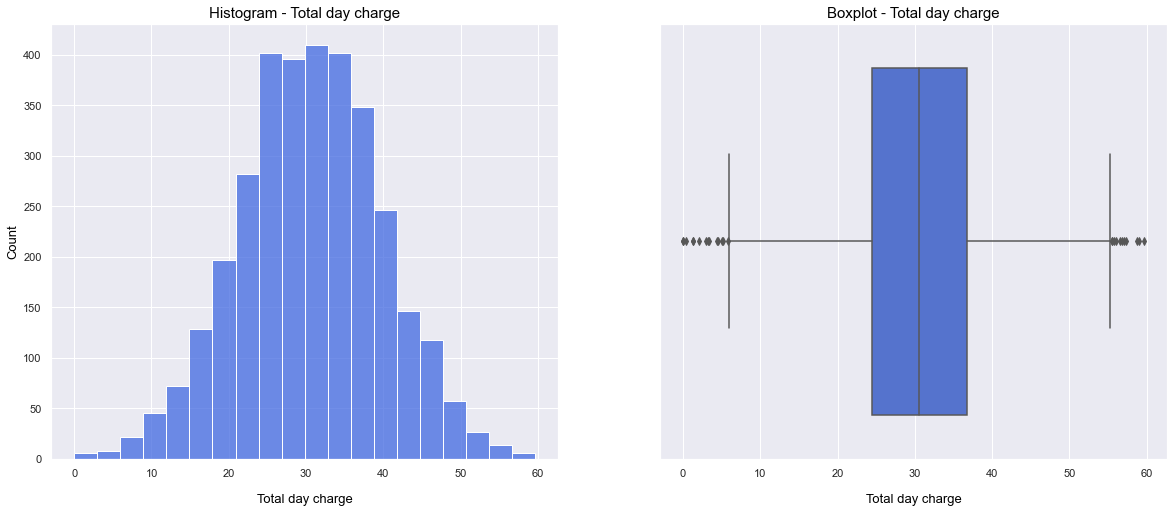



-------------------------------------------------------------------------------------------------------------------




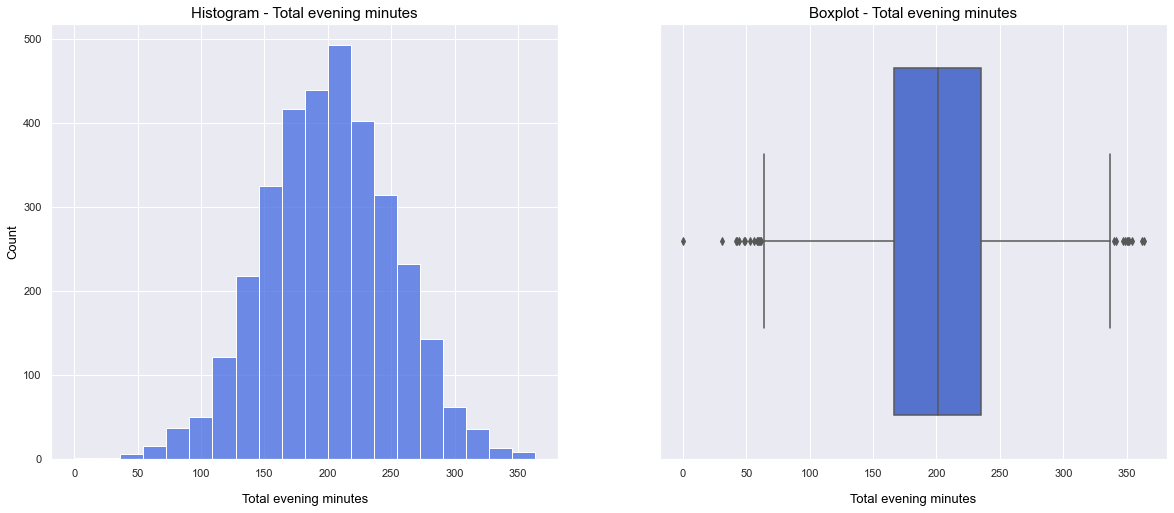



-------------------------------------------------------------------------------------------------------------------




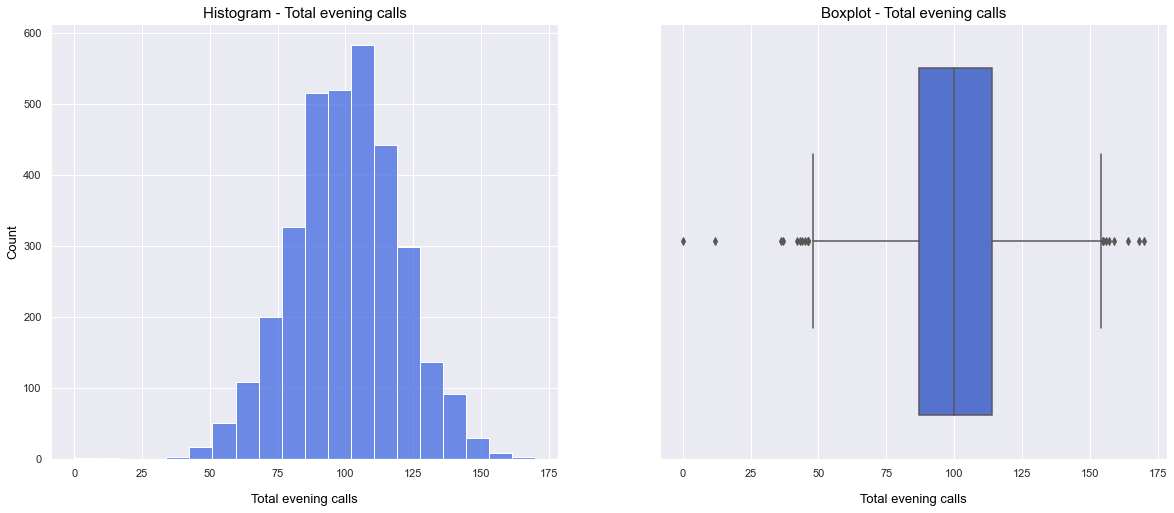



-------------------------------------------------------------------------------------------------------------------




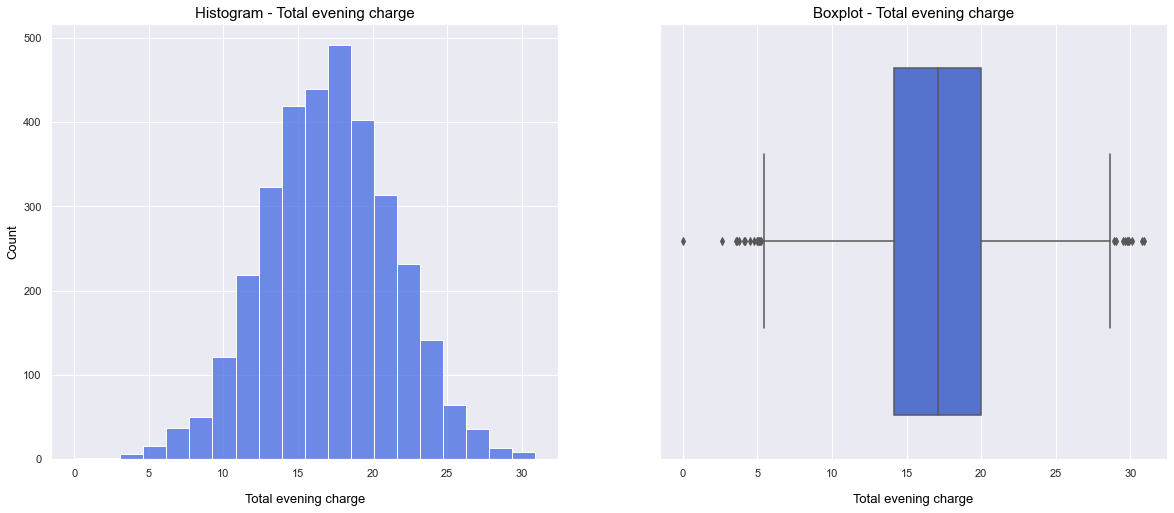



-------------------------------------------------------------------------------------------------------------------




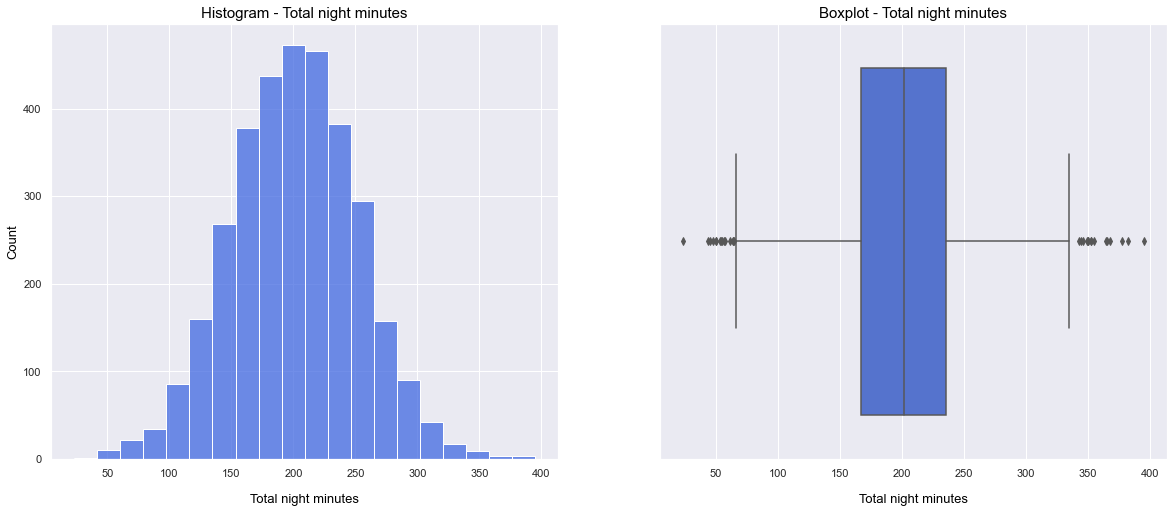



-------------------------------------------------------------------------------------------------------------------




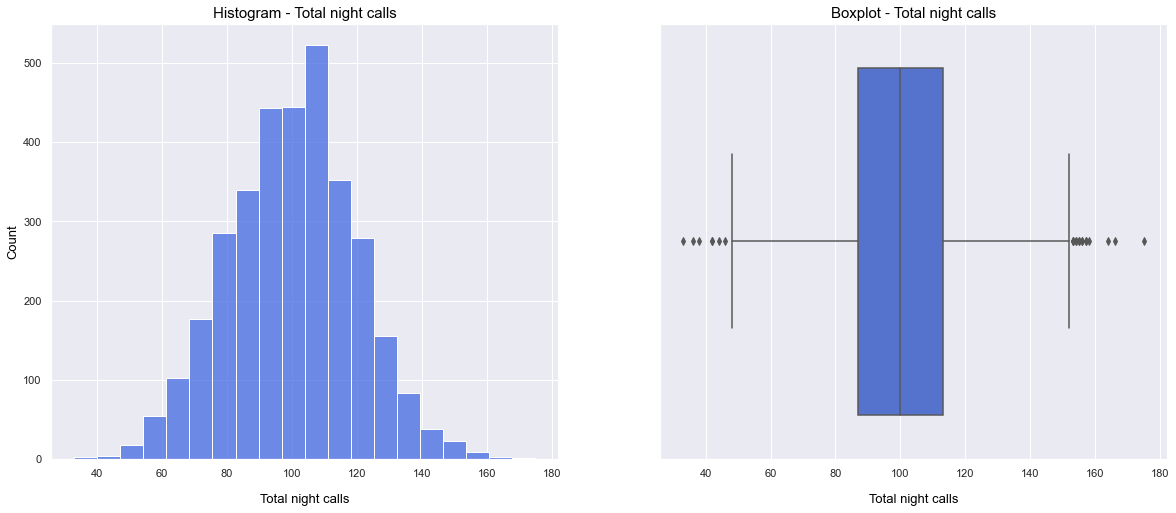



-------------------------------------------------------------------------------------------------------------------




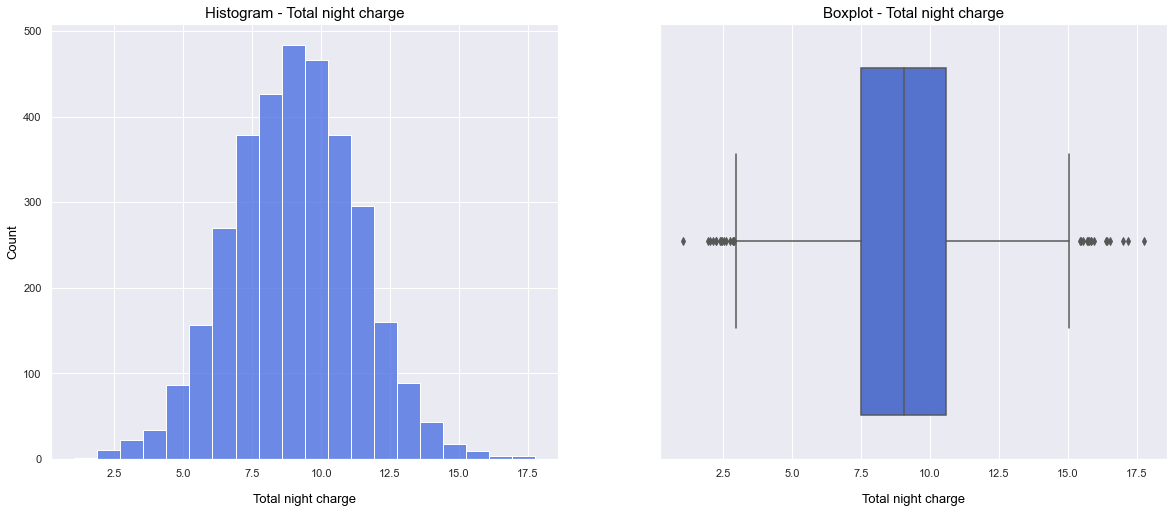



-------------------------------------------------------------------------------------------------------------------




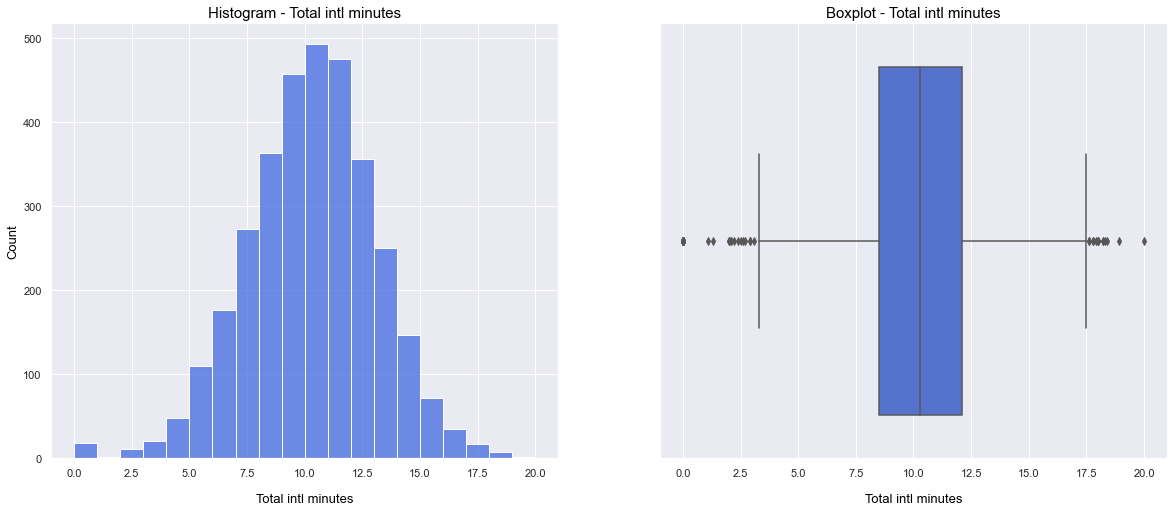



-------------------------------------------------------------------------------------------------------------------




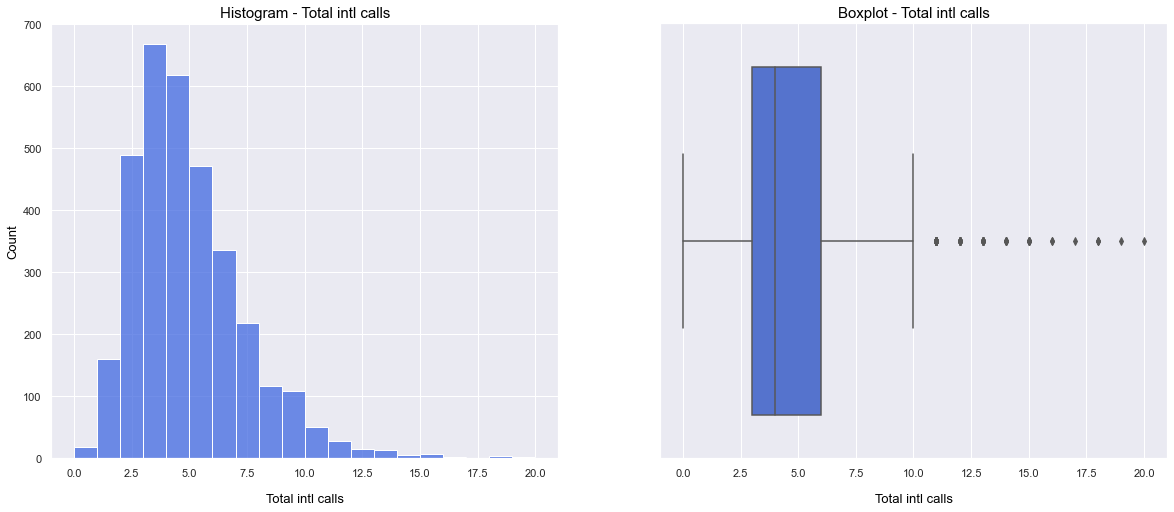



-------------------------------------------------------------------------------------------------------------------




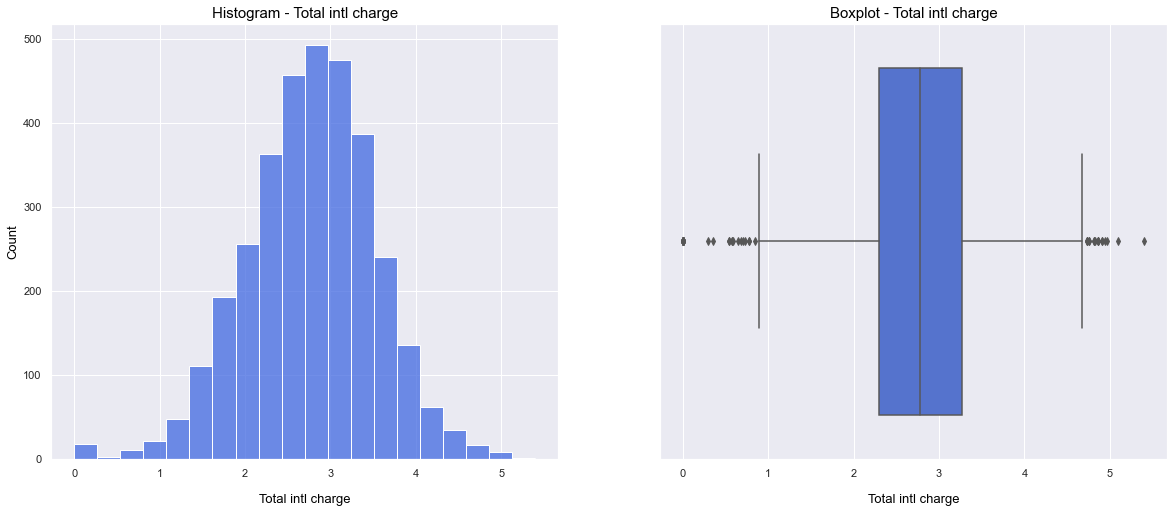



-------------------------------------------------------------------------------------------------------------------




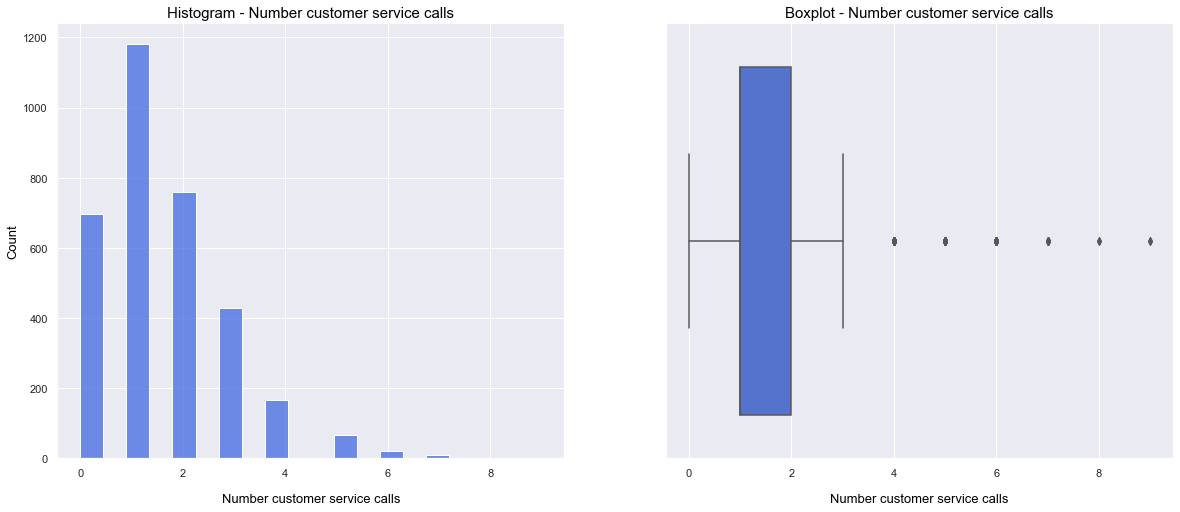



-------------------------------------------------------------------------------------------------------------------




In [10]:
# We can now iterate it over numeric columns:

num_dict = {'Account length': df_train['account_length'], 'Number voice mail messages': df_train['number_vmail_messages'], 
           'Total day minutes': df_train['total_day_minutes'], 'Total day calls': df_train['total_day_calls'], 
           'Total day charge': df_train['total_day_charge'], 'Total evening minutes': df_train['total_eve_minutes'], 
           'Total evening calls': df_train['total_eve_calls'], 'Total evening charge': df_train['total_eve_charge'],
           'Total night minutes': df_train['total_night_minutes'], 'Total night calls': df_train['total_night_calls'],
           'Total night charge': df_train['total_night_charge'], 'Total intl minutes': df_train['total_intl_minutes'], 
           'Total intl calls': df_train['total_intl_calls'], 'Total intl charge': df_train['total_intl_charge'],
           'Number customer service calls': df_train['number_customer_service_calls']}

for name, column in num_dict.items():

    plot_outliers(column, name, 'Histogram - ' + name, 'Boxplot - ' + name)
    print('\n')
    print('-------------------------------------------------------------------------------------------------------------------')
    print('\n')

`Account length` - Apparently normal distributed. Presence of **outliers** on the right side of the boxplot. It is possible, however, to exist customers with longer accounts, the reason why we **won't make any treatment** in this feature.

`Number voice mail messages` - Not possible to infer a normal distribution as the major part of the data belongs to the customers that possibly **don't use voice mail messages**. Boxplot doesn't indicate significant presence of outliers.

`Total day minutes` - Apparently normal distributed. Presence of **outliers** on both sides of the boxplot. Most of the customers use the service for around **180 minutes**. The outlier data don't seem to indicate any problem.

`Total day calls` - Apparently left-skewed distributed. Presence of **outliers** on both sides of the boxplot. **No need to further treatment**. Most of the customers make around **100 calls**.

`Total day charge` - Apparently normal distributed. Presence of **outliers** on both sides of the boxplot. **No need to further treatment**. Most of the data is situated in around **30 units**.

`Total evening minutes` - Apparently normal distributed. Presence of **outliers** on both sides of the boxplot. **No need to further treatment**. Most of the customers use the service for around **200 minutes**.

`Total evening calls` - Apparently left-skewed distributed. Presence of **outliers** on both sides of the boxplot. **No need to further treatment**. Most of the customers make around **100 calls**.

`Total evening charge` - Apparently normal distributed. Presence of **outliers** on both sides of the boxplot. **No need to further treatment**. Most of the data is situated in around **17 units**.

`Total night minutes`- Apparently normal distributed. Presence of **outliers** on both sides of the boxplot. **No need to further treatment**. Most of the customers use the service for around **200 minutes**.

`Total night calls` - Apparently normal distributed. Presence of **outliers** on both sides of the boxplot. **No need to further treatment**. Most of the customers make around **100 calls**.

`Total night charge` - Apparently normal distributed. Presence of **outliers** on both sides of the boxplot. **No need to further treatment**. Most of the data is situated in around **9 units**.

`Total intl minutes` - Apparently normal distributed. Presence of **outliers** on both sides of the boxplot. **No need to further treatment**. Most of the customers use the service for around **10 minutes**.

`Total intl calls` - Apparently right-skewed distributed. Presence of **outliers** on the right side of the boxplot. **No need to further treatment**. Most of the customers make around **4 calls**.

`Total intl charge` - Apparently normal distributed. Presence of **outliers** on both sides of the boxplot. **No need to further treatment**. Most of the data is situated in around **2 units**.

`Number customer service calls` - Most of the customers have **only 1 service call**. Presence of **outliers** on the right side of the boxplot. **No need to further treatment**.

\
In order to better understand the distribution of the feature `Number voice mail messages`, we can omit the values less than zero:

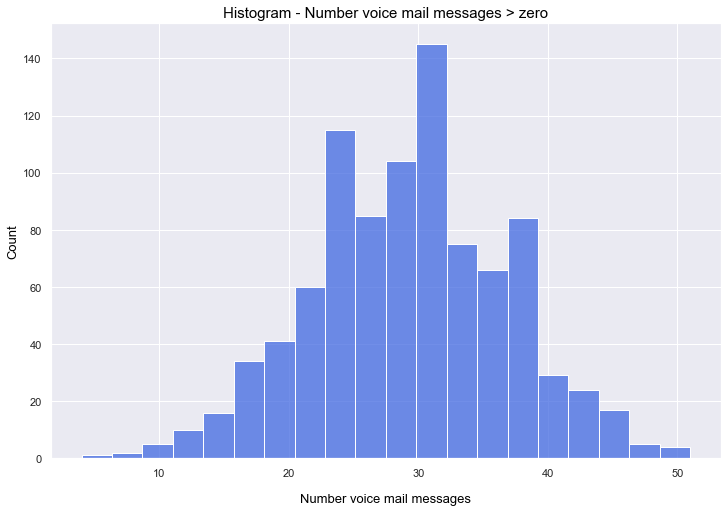

In [11]:
sns.set(style = 'darkgrid')

plt.figure(figsize = (12,8))

ax =  sns.histplot(x = df_train[df_train['number_vmail_messages'] > 0]['number_vmail_messages'], 
             color = 'royalblue', kde = False, bins = 20)

ax.set_title('Histogram - Number voice mail messages > zero', fontsize = 15, color = 'black')

ax.set_ylabel('Count', color = 'black', fontsize = 13)

ax.set_xlabel('Number voice mail messages', color = 'black', fontsize = 13, labelpad = 15)

plt.show()

* For the customers that use voice mail messages, the data is **apparently normal distributed**.

\
For the categorical columns, we can evaluate the proportion among the unique values:

In [12]:
# Function to create a barplot:

def cat_barplot(column, title, diff):
    
    proportion = round(column.value_counts(normalize = True)*100, 2)
    labels = [i for i in proportion.keys()]
    
    plt.figure(figsize = (10, 6))
    plt.title(title, fontsize = 15, color = 'black')
    plt.bar(labels, proportion, width = 0.6, color = "royalblue")
    plt.grid(False)
    
    for i, v in enumerate(proportion):
        plt.text(i - diff, v + 0.5, str(v) + '%')
        
    plt.yticks([])
    plt.show()

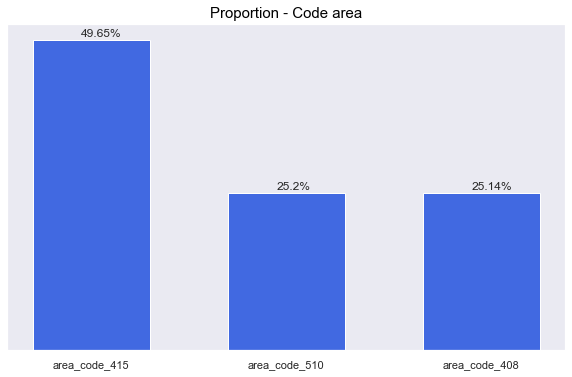



-----------------------------------------------------------------------------------------------------------




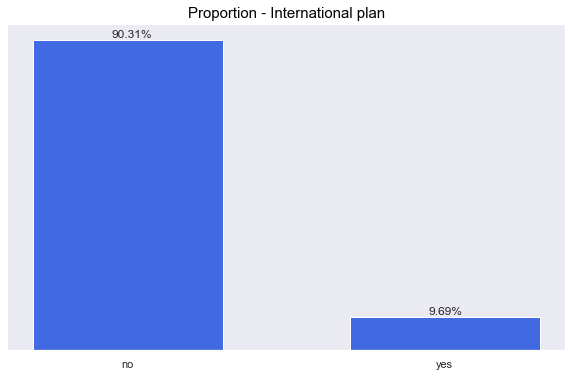



-----------------------------------------------------------------------------------------------------------




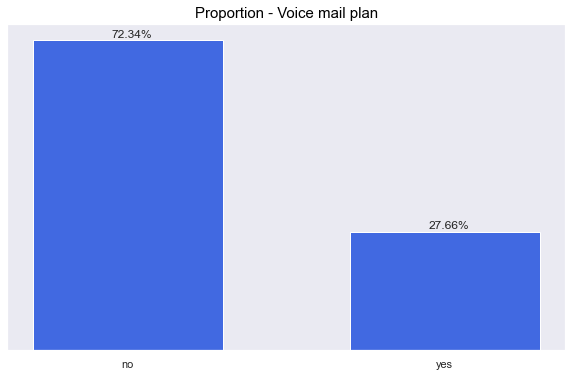



-----------------------------------------------------------------------------------------------------------




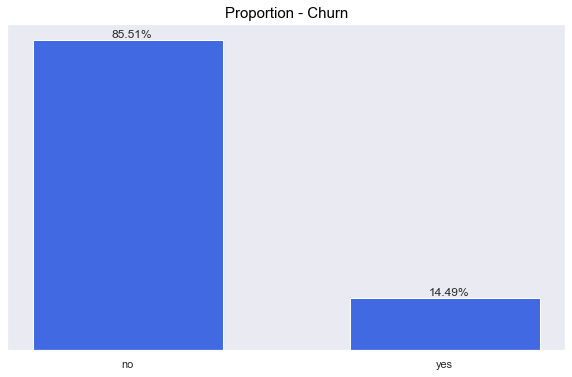



-----------------------------------------------------------------------------------------------------------




In [13]:
# We can now iterate it over categorical columns:

cat_dict = {'Code area': df_train['area_code'], 'International plan': df_train['international_plan'], 
           'Voice mail plan': df_train['voice_mail_plan'], 'Churn': df_train['churn']}

for name, column in cat_dict.items():
    
    cat_barplot(column, 'Proportion - ' + name, 0.05)
    print('\n')
    print('-----------------------------------------------------------------------------------------------------------')
    print('\n')

`Code area` - In terms of coverage, most of the customers have service in the **415 code area**. 

`International plan` - The major part of the customers **don't have international plan**.

`Voice mail plan` - Most of the customers **don't have voice mail plan**, as we previously observed.

`Churn` - The current churn is around **14.5%**, higher than the average of similar companies in the Brazilian sector.

\
At this point, it is appropriate to segregate the features between the customers with positive churn status and the others. We are interested in knowing whether or not the difference between the two classes of customers is relevant.

In [14]:
# Function to plot side by side a boxplot and a barplot:

def class_distribution(numerical, title_num1, **kwargs):
    
    plt.figure(figsize = (12,8))

    sns.set(style = 'darkgrid')
    
    # Boxplot between the feature and 'churn status':
    
    ax0 = plt.subplot(121)
    ax0 = sns.boxplot(data = df_train, x = 'churn', y = numerical, orient = 'v', width = 0.5, 
                 color = 'royalblue')
    ax0.set_title(title_num1, fontsize = 15, color = 'black', y = 1.02)
    
    
    if 'categorical' in kwargs:
    
        # Creating an auxiliary filter for 'churn status'

        df_filter = df_train[[kwargs['categorical'], 'churn']]

        df_filter_churn = df_filter[df_filter['churn'] == 'yes']
        df_filter_churn = df_filter_churn.rename(columns = {'churn': 'churn_yes'})
        df_filter_churn = df_filter_churn.groupby(kwargs['categorical']).agg(func = 'count')


        df_filter_nonchurn = df_filter[df_filter['churn'] == 'no']
        df_filter_nonchurn = df_filter_nonchurn.rename(columns = {'churn': 'churn_no'})
        df_filter_nonchurn = df_filter_nonchurn.groupby(kwargs['categorical']).agg(func = 'count')

        df_filter_final = df_filter_churn.join(df_filter_nonchurn)
        df_filter_final['total'] = df_filter_final['churn_yes'] + df_filter_final['churn_no']
        df_filter_final['yes_percent'] = round(100 * df_filter_final['churn_yes'] / df_filter_final['total'], 2)
        df_filter_final = df_filter_final.sort_values("yes_percent", ascending=False)

        # Barplot between the feature and 'churn status':

        ax1 = plt.subplot(122)

        sns.set_color_codes('pastel')
        ax1 =sns.barplot(x = 'total', y = df_filter_final.index, data = df_filter_final, color = '0.9')

        sns.set_color_codes('muted')
        sns.barplot(x = 'yes_percent', y = df_filter_final.index, data = df_filter_final, color = 'royalblue')

        ax1.set(xlim = (0, 100), ylabel = "", xlabel = '%')
        ax1.set_title(kwargs['title_cat'], color = 'black', fontsize = 15, y = 1.02)
        ax1.bar_label(ax1.containers[1], fmt = '%1.1f%%')
        
    if 'numerical2' in kwargs:
        
        # Boxplot between the feature and 'churn status':
        
        ax1 = plt.subplot(122)
        ax1 = sns.boxplot(data = df_train, x = 'churn', y = kwargs['numerical2'], orient = 'v', width = 0.5, 
                     color = 'royalblue')
        ax1.set_title(kwargs['title_num2'], fontsize = 15, color = 'black', y = 1.02)
    
    plt.tight_layout()
    plt.show()

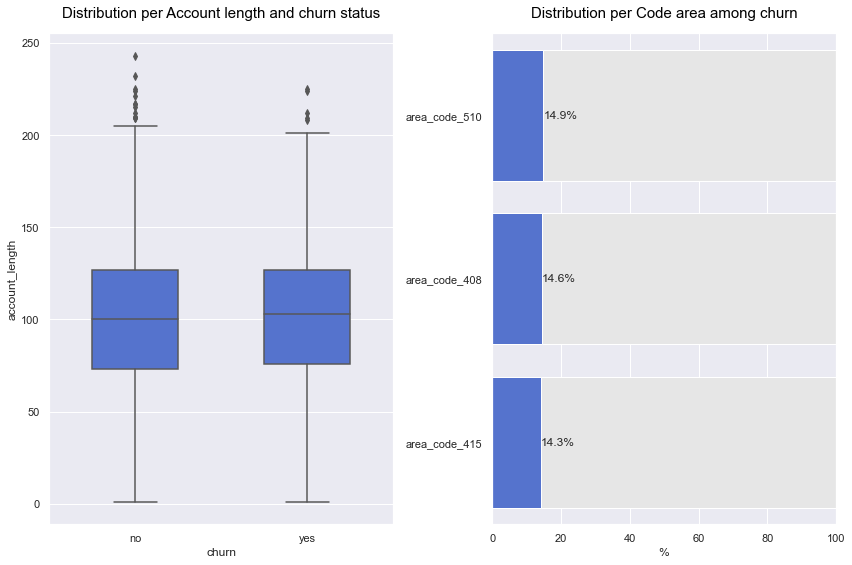



---------------------------------------------------------------------------------------------------------------




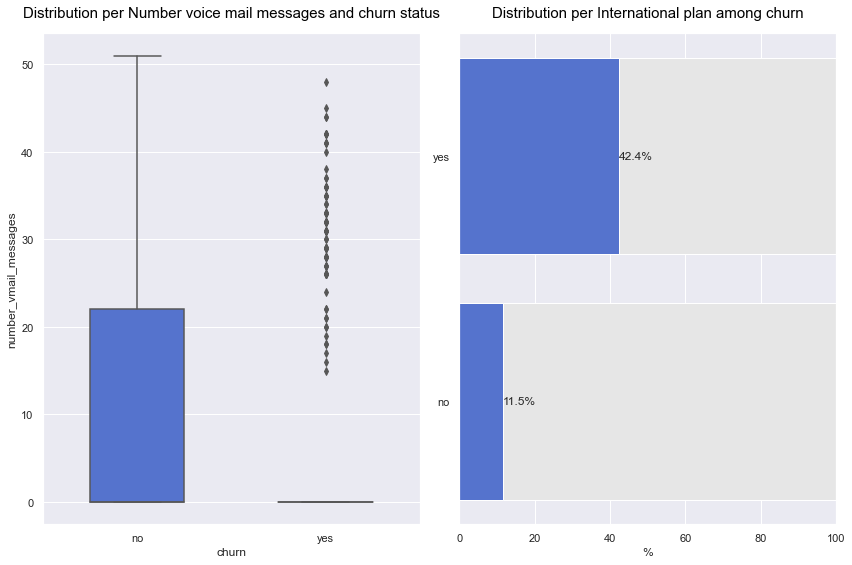



---------------------------------------------------------------------------------------------------------------




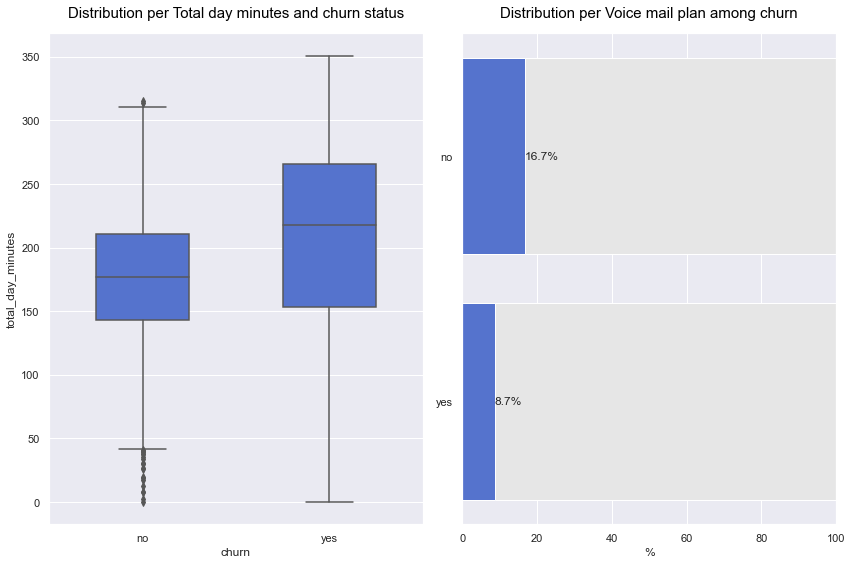



---------------------------------------------------------------------------------------------------------------




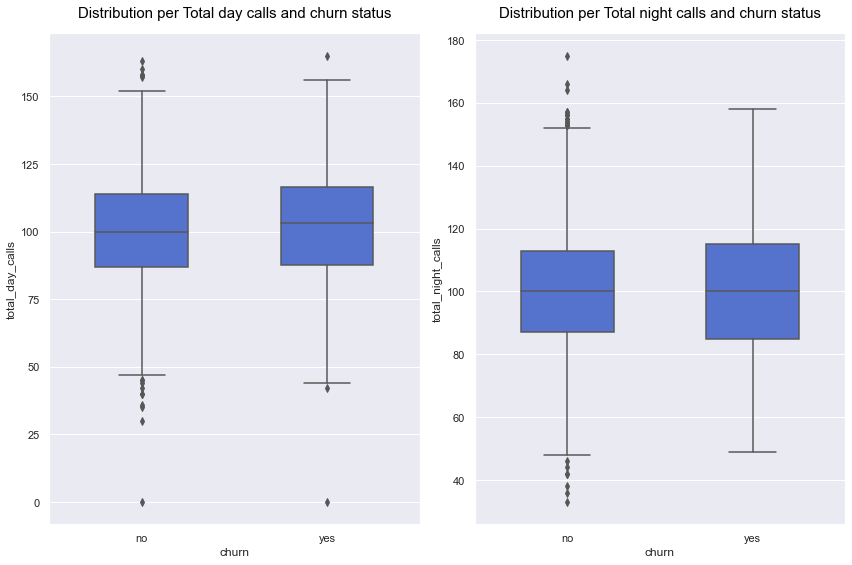



---------------------------------------------------------------------------------------------------------------




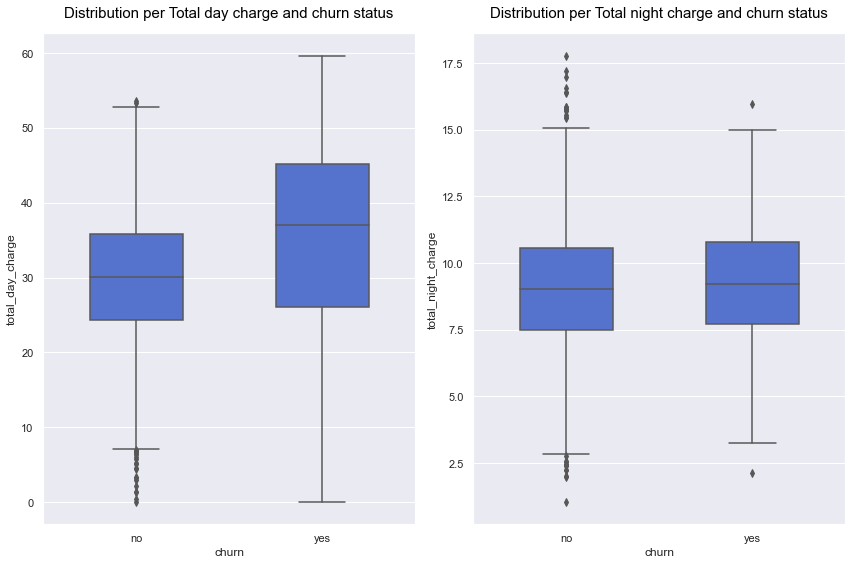



---------------------------------------------------------------------------------------------------------------




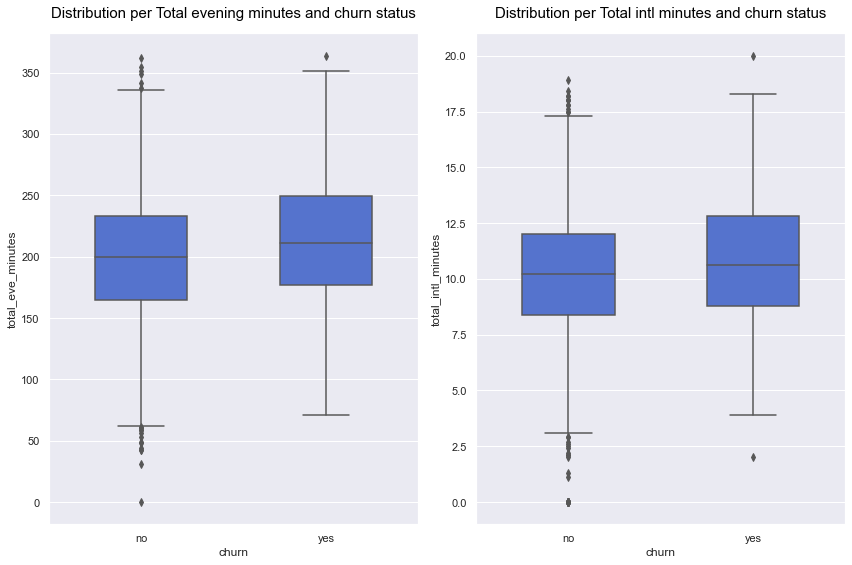



---------------------------------------------------------------------------------------------------------------




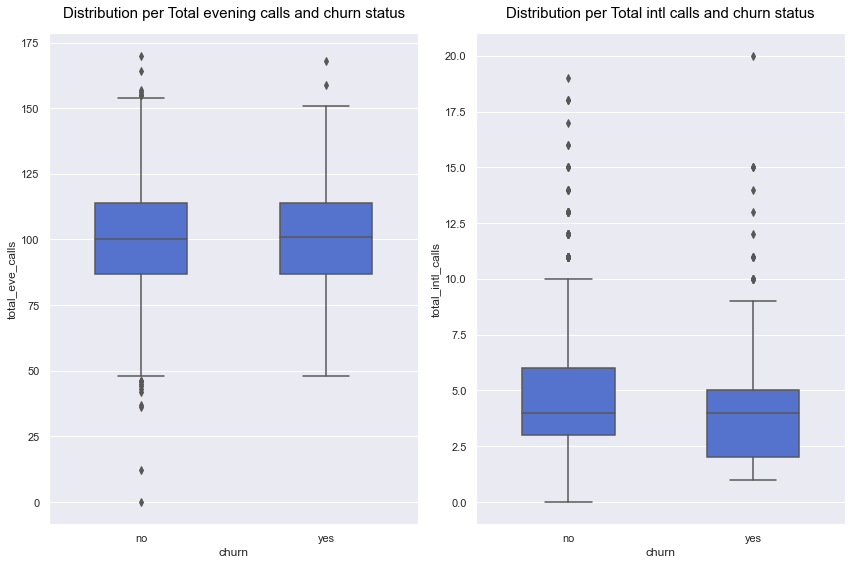



---------------------------------------------------------------------------------------------------------------




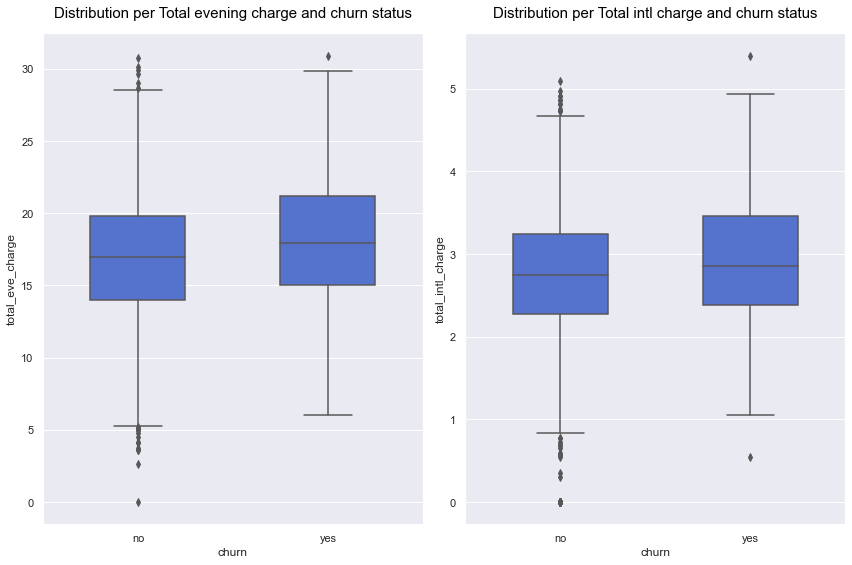



---------------------------------------------------------------------------------------------------------------




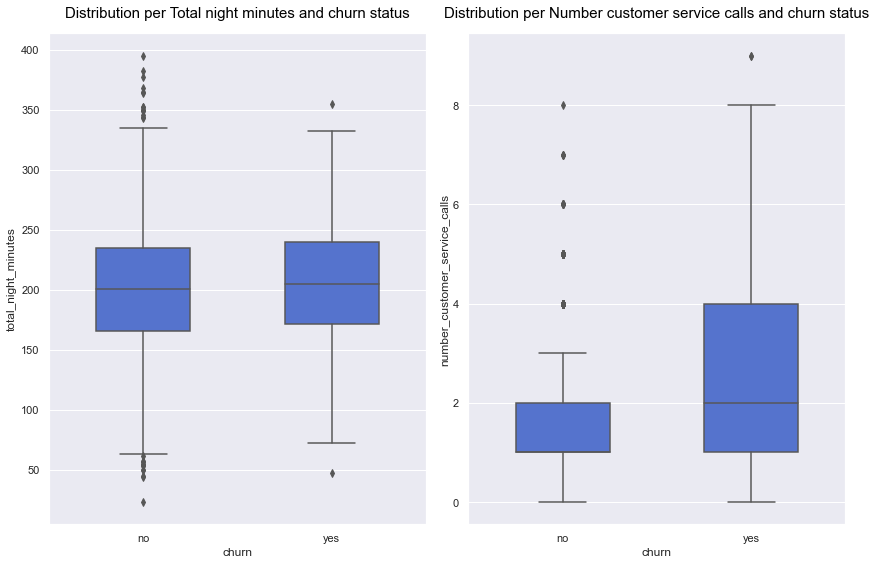



---------------------------------------------------------------------------------------------------------------




In [15]:
# Iterating over numerical and categorical columns:

numerical_columns = {'Account length': 'account_length', 'Number voice mail messages': 'number_vmail_messages',
                     'Total day minutes': 'total_day_minutes','Total day calls': 'total_day_calls',
                     'Total day charge': 'total_day_charge', 'Total evening minutes': 'total_eve_minutes', 
                     'Total evening calls': 'total_eve_calls','Total evening charge': 'total_eve_charge', 
                     'Total night minutes': 'total_night_minutes','Total night calls': 'total_night_calls',
                     'Total night charge': 'total_night_charge','Total intl minutes': 'total_intl_minutes', 
                     'Total intl calls': 'total_intl_calls','Total intl charge': 'total_intl_charge', 
                     'Number customer service calls': 'number_customer_service_calls'}

categorical_columns = {'Code area': 'area_code', 'International plan': 'international_plan', 
                       'Voice mail plan': 'voice_mail_plan'}

for num, cat in zip(dict(list(numerical_columns.items())[0:3]).items(), categorical_columns.items()):
    
    class_distribution(num[1], 'Distribution per ' + num[0] + ' and churn status', categorical = cat[1],
                        title_cat = 'Distribution per ' + cat[0] + ' among churn')
    
    print('\n')
    print('---------------------------------------------------------------------------------------------------------------')
    print('\n')

for num1, num2 in zip(dict(list(numerical_columns.items())[3:9]).items(), dict(list(numerical_columns.items())[9:]).items()):
    
    class_distribution(num1[1], 'Distribution per ' + num1[0] + ' and churn status', numerical2 = num2[1],
                       title_num2 = 'Distribution per ' + num2[0] + ' and churn status')
    
    print('\n')
    print('---------------------------------------------------------------------------------------------------------------')
    print('\n')

Some conclusions from the plots:

* The **period of time** a customer stay with the services seemed not impact the choice of leaving the company;
* There is a practically constant distribution of customers among the **code areas**;
* 42.4% of the customers with **international plan** are classified as positive churn;
* The churn is greater among customers that don't have a **voice mail plan**;
* In general, the customers that **use more the service** are more prone to leave the company.
* The features `Account length`, `Code area`, `Total day calls`,  `Total evening calls`, `Total night calls`, `Total evening charge`, `Total intl charge`, `Total night charge` presented similar patters between the two classes of churn and thus **don't seem to be good predictors**;
* Especially the features `Internation plan`, `Number voice mail messages`, `Number customer service calls` and `Total day minutes` **showed differentiation** between the data for customers with positive status and the rest of the base.

\
Similarly to what we did before, let's isolate the customers with zero voice mail messages:

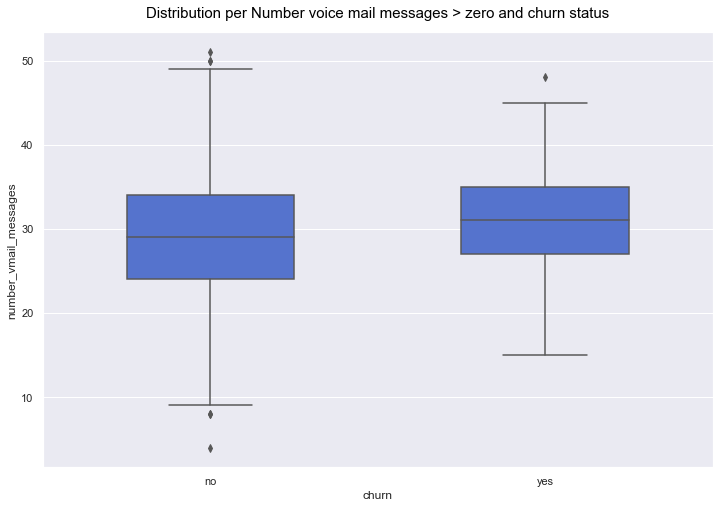

In [16]:
plt.figure(figsize = (12,8))

sns.set(style = 'darkgrid')

# Boxplot between the feature and 'churn status':

ax = sns.boxplot(data = df_train[df_train['number_vmail_messages'] > 0], x = 'churn', y = 'number_vmail_messages', 
            orient = 'v', width = 0.5, 
                 color = 'royalblue')

ax.set_title('Distribution per Number voice mail messages > zero and churn status', fontsize = 15, color = 'black', y = 1.02)

plt.show()

There is a **slight difference** between the two classes of churn in terms of `Number voice mail messages` for customers who use this service.

## Feature Engineering

In order to increase the number of **available features**, we identified the possibility to convert the `Number customer service calls` into a categorical column, called `Use customer service calls`:

In [17]:
df_train.insert(loc = 19, value = df_train['number_customer_service_calls'].apply(lambda x: 'no' if x == 0 else 'yes'), 
                                         column = 'use_customer_service_calls')
df_train.sample(5)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,use_customer_service_calls,churn
1082,NC,64,area_code_408,no,yes,19,291.1,150,49.49,226.7,123,19.27,219.1,67,9.86,7.5,2,2.03,1,yes,no
2248,CO,80,area_code_415,no,no,0,194.8,116,33.12,209.9,93,17.84,194.1,100,8.73,12.8,3,3.46,0,no,no
1737,NV,115,area_code_415,no,no,0,286.4,125,48.69,205.7,74,17.48,191.4,141,8.61,6.9,6,1.86,1,yes,yes
2225,OH,68,area_code_510,no,no,0,143.6,80,24.41,134.3,65,11.42,215.6,84,9.70,15.5,5,4.19,2,yes,no
1644,WI,107,area_code_408,no,no,0,134.0,104,22.78,174.5,94,14.83,311.1,79,14.00,7.3,3,1.97,3,yes,no


For this last feature, we can also plot both the proportion of the classes and the distribution of them regarding the churn status:

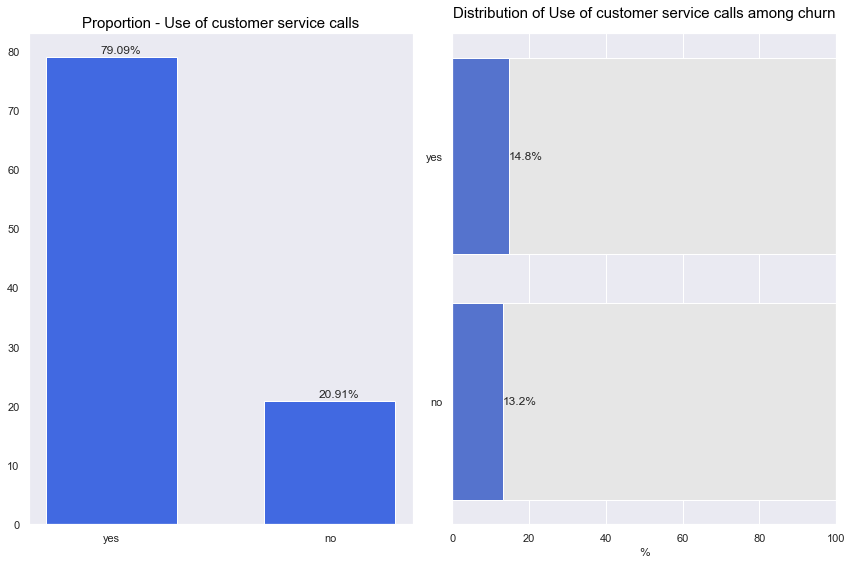

In [18]:
plt.figure(figsize = (12,8))

sns.set(style = 'darkgrid')

ax0 = plt.subplot(121)

proportion = round(df_train['use_customer_service_calls'].value_counts(normalize = True)*100, 2)
labels = [i for i in proportion.keys()]

ax0 = plt.bar(labels, proportion, width = 0.6, color = "royalblue")
plt.title('Proportion - Use of customer service calls', fontsize = 15, color = 'black')
plt.grid(False)

for i, v in enumerate(proportion):
    plt.text(i - 0.05, v + 0.5, str(v) + '%')

####################################################################################
    
df_filter = df_train[['use_customer_service_calls', 'churn']]

df_filter_churn = df_filter[df_filter['churn'] == 'yes']
df_filter_churn = df_filter_churn.rename(columns = {'churn': 'churn_yes'})
df_filter_churn = df_filter_churn.groupby('use_customer_service_calls').agg(func = 'count')

df_filter_nonchurn = df_filter[df_filter['churn'] == 'no']
df_filter_nonchurn = df_filter_nonchurn.rename(columns = {'churn': 'churn_no'})
df_filter_nonchurn = df_filter_nonchurn.groupby('use_customer_service_calls').agg(func = 'count')

df_filter_final = df_filter_churn.join(df_filter_nonchurn)
df_filter_final['total'] = df_filter_final['churn_yes'] + df_filter_final['churn_no']
df_filter_final['yes_percent'] = round(100 * df_filter_final['churn_yes'] / df_filter_final['total'], 2)
df_filter_final = df_filter_final.sort_values("yes_percent", ascending=False)

ax1 = plt.subplot(122)

sns.set_color_codes('pastel')
ax1 =sns.barplot(x = 'total', y = df_filter_final.index, data = df_filter_final, color = '0.9')

sns.set_color_codes('muted')
sns.barplot(x = 'yes_percent', y = df_filter_final.index, data = df_filter_final, color = 'royalblue')

ax1.set(xlim = (0, 100), ylabel = "", xlabel = '%')
ax1.set_title('Distribution of Use of customer service calls among churn', color = 'black', fontsize = 15, y = 1.02)
ax1.bar_label(ax1.containers[1], fmt = '%1.1f%%')

plt.tight_layout()
plt.show()

We see that the most of the customers **use at least once the service call**. However, in terms of distribution among churn status, we **don't identify a clear advantage** in the use of this feature.  

## Statistical Analysis

It is also important to formally check our previous visual assumptions. To help us with the task we can make use of statistical tests, according to the type of data we are analysing.

\
For numerical columns, we use the **Shapiro-Wilk** test from Scipy-Stats library. This test assumes as **Null Hypotheses** that the samples are from normal distribution:

In [19]:
num_parametric_features = {}

num_non_parametric_features = {}

for k, v in numerical_columns.items():
    
    shapiro_test = stats.shapiro(df_train[v])[1]
    
    if shapiro_test > 0.05: #Setting a significance level of 5%
        
        print(f'The feature \033[1m{k}\033[0m is normally distributed')
        
        print('\n')
        
        num_parametric_features[k] = v
              
    else:
        
        print(f'The feature \033[1m{k}\033[0m is not normally distributed')
        
        print('\n')
        
        num_non_parametric_features[k] = v

The feature Account length is not normally distributed


The feature Number voice mail messages is not normally distributed


The feature Total day minutes is normally distributed


The feature Total day calls is not normally distributed


The feature Total day charge is normally distributed


The feature Total evening minutes is normally distributed


The feature Total evening calls is not normally distributed


The feature Total evening charge is normally distributed


The feature Total night minutes is normally distributed


The feature Total night calls is normally distributed


The feature Total night charge is normally distributed


The feature Total intl minutes is not normally distributed


The feature Total intl calls is not normally distributed


The feature Total intl charge is not normally distributed


The feature Number customer service calls is not normally distributed




\
We can also test the feature `Number voice mail message` with values **greater than zero**:

In [20]:
if stats.shapiro(df_train[df_train['number_vmail_messages'] > 0]['number_vmail_messages'])[1] > 0.05:
    
    print(f'The feature \033[1mNumber voice mail messages > zero\033[0m is normally distributed')
        
    print('\n')
    
    num_parametric_features[k] = v
              
else:

    print(f'The feature \033[1mNumber voice mail messages > zero\033[0m  is not normally distributed')

    print('\n')
    
    num_non_parametric_features[k] = v

The feature Number voice mail messages > zero is normally distributed




For the numerical features that are normally distributed, we can conduct a **Two Sample T-Test**. There are three assumptions regarding the data groups:
* The two samples data groups are independent. (✔)
* The data elements in respective groups follow any normal distribution. (✔)
* The given two samples have similar variances.

In [21]:
# Creating a mask for the number of voice messages greater than zero:

df_vmail_positive = df_train[df_train['number_vmail_messages'] > 0]

for k,v in num_parametric_features.items():
    
    if v == 'number_vmail_messages':
        
        group1 = df_vmail_positive[df_vmail_positive['churn'] == 'yes'][v]
        group2 = df_vmail_positive[df_vmail_positive['churn'] == 'no'][v]
        
    else:
        
        group1 = df_train[df_train['churn'] == 'yes'][v]
        group2 = df_train[df_train['churn'] == 'no'][v]


    # Calculating variance for each group
    
    var1 = np.var(group1)
    var2 = np.var(group2)
    
    # If the ratio of the larger data group to the small data group is less than 4:1,
    # then we can consider that the given data groups have equal variance.

    if var1 > var2:

        ratio = var1 / var2

    else:

        ratio = var2 / var1

    if ratio <= 4:

        equal_var = True

    else:

        equal_var = False # If false, perform Welch's t-test
        
    p_value = stats.ttest_ind(a = group1, b = group2, equal_var = equal_var)[1]
    
    # The null hypotheses is that the population mean of group 1 is equal to group 2
    
    if p_value < 0.05:
        
        print(f'The mean of the groups of the feature \033[1m{k}\033[0m is different')
        
        print('\n')
        
    else:
        
        print(f'The mean of the groups of the feature \033[1m{k}\033[0m is not different')
        
        print('\n')

The mean of the groups of the feature Total day minutes is different


The mean of the groups of the feature Total day charge is different


The mean of the groups of the feature Total evening minutes is different


The mean of the groups of the feature Total evening charge is different


The mean of the groups of the feature Total night minutes is different


The mean of the groups of the feature Total night calls is not different


The mean of the groups of the feature Total night charge is different


The mean of the groups of the feature Number customer service calls is different




\
For the numerical features not normally distributed, we can perform a non-parametric test like **Kruskal-Wallis**. The null hypotheses is that the median is the same for all the data groups.

In [22]:
for k,v in num_non_parametric_features.items():
    
    group1 = df_train[df_train['churn'] == 'yes'][v]
    group2 = df_train[df_train['churn'] == 'no'][v]
    
    p_value = stats.kruskal(group1, group2)[1]
    
    
    if p_value < 0.05:
        
        print(f'The median of the groups of the feature \033[1m{k}\033[0m is different')
        
        print('\n')
        
    else:
        
        print(f'The median of the groups of the feature \033[1m{k}\033[0m is not different')
        
        print('\n')

The median of the groups of the feature Account length is not different


The median of the groups of the feature Number voice mail messages is different


The median of the groups of the feature Total day calls is not different


The median of the groups of the feature Total evening calls is not different


The median of the groups of the feature Total intl minutes is different


The median of the groups of the feature Total intl calls is different


The median of the groups of the feature Total intl charge is different


The median of the groups of the feature Number customer service calls is different




\
As for categorical features, we'll also make use of **Kruskal-Wallis** test:

In [23]:
cat_non_parametric_features = {'Code area': 'area_code', 'International plan': 'international_plan', 
                               'Voice mail plan': 'voice_mail_plan', 
                               'Use of customer service calls': 'use_customer_service_calls'}

for k,v in cat_non_parametric_features.items():
    
    group1 = df_train[df_train['churn'] == 'yes'][v]
    group2 = df_train[df_train['churn'] == 'no'][v]
    
    p_value = stats.kruskal(group1, group2)[1]
    
    
    if p_value < 0.05:
        
        print(f'The median of the groups of the feature \033[1m{k}\033[0m is different')
        
        print('\n')
        
    else:
        
        print(f'The median of the groups of the feature \033[1m{k}\033[0m is not different')
        
        print('\n')

The median of the groups of the feature Code area is not different


The median of the groups of the feature International plan is different


The median of the groups of the feature Voice mail plan is different


The median of the groups of the feature Use of customer service calls is not different




## Feature Correlation

In [24]:
# Transforming the categorical values 'International plan', 'Use customer service calls' and 'churn' into numerical '0' or '1':

map_columns = ['international_plan','voice_mail_plan', 'use_customer_service_calls', 'churn']

for column in map_columns: 

    df_train[column] = df_train[column].map({'no': 0, 'yes': 1})

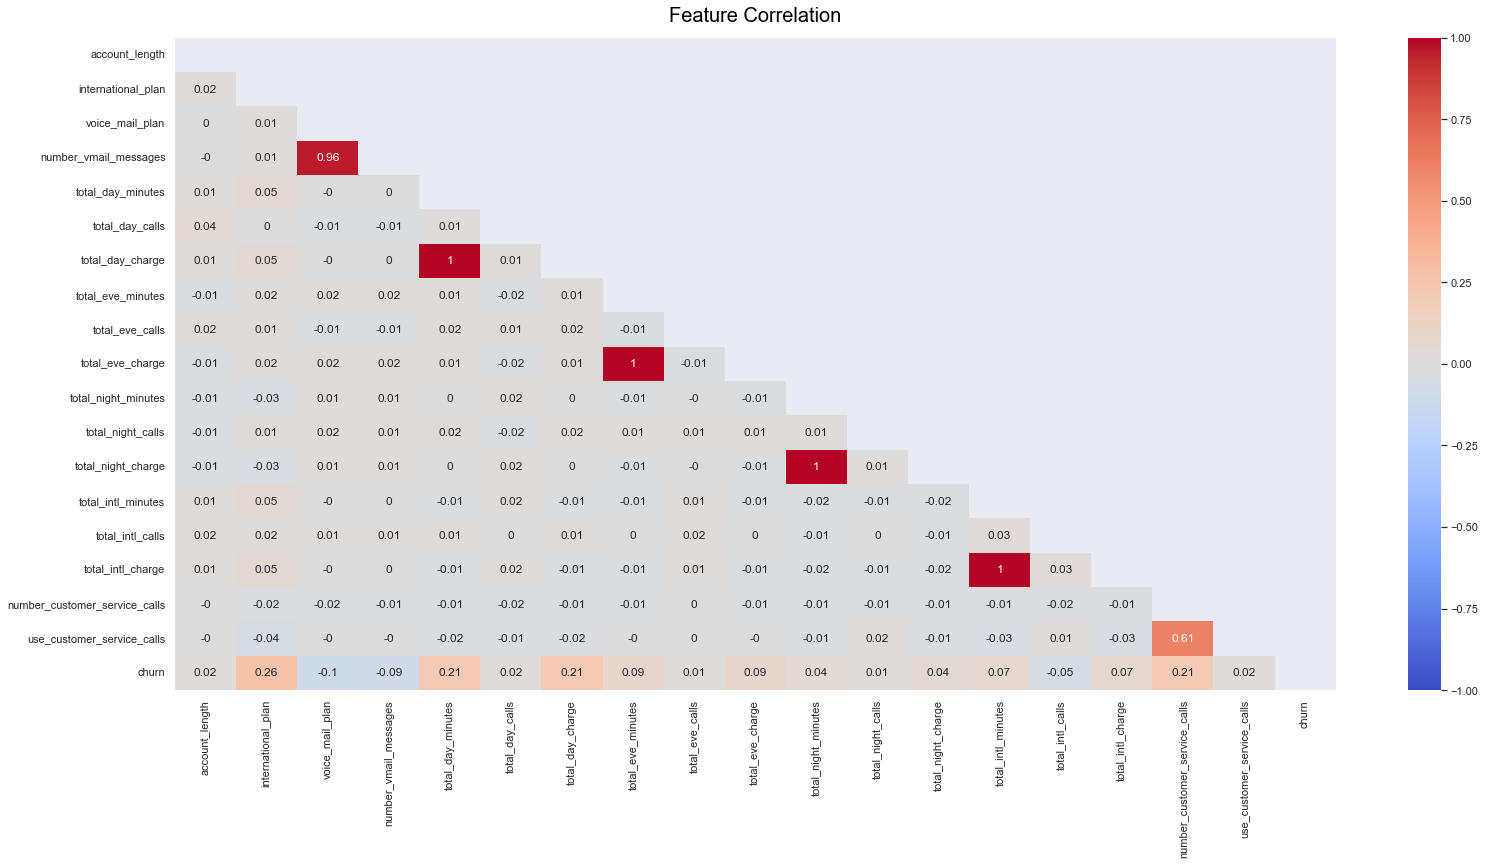

In [25]:
plt.figure(figsize=(26, 12))
mask = np.triu(np.ones_like(df_train.corr(), dtype=bool))
ax = sns.heatmap(round(df_train.corr(), 2), vmin=-1, vmax=1, annot=True, cmap='coolwarm', mask = mask)
ax.set_title('Feature Correlation', fontdict={'fontsize':20}, pad=16, color = 'black')
sns.set(font_scale=1.6)
plt.show()

* Important to note the **high positive correlation** between `Number of voice mail messages` and `Voice mail plan`, and between `Number of customer service calls` and `Use costumer service calls`. In fact, these features are just variations from each other.

* It is also interesting to observe the perfect **positive correlation** between the features `Charge` and `Minutes`, indicating that we need to exclude one of them from our training set.

\
Let's now import our test set:

In [3]:
df_test = pd.read_csv('projeto4_telecom_teste.csv', index_col = 0)
df_test.sample(5)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
904,FL,91,area_code_415,no,no,0,153.2,70,26.04,231.7,91,19.69,115.1,80,5.18,9.8,3,2.65,4,yes
926,MO,86,area_code_510,no,no,0,223.0,109,37.91,286.2,76,24.33,257.8,132,11.60,7.5,7,2.03,3,yes
1141,MS,76,area_code_408,no,no,0,193.0,82,32.81,200.8,109,17.07,135.9,79,6.12,14.4,3,3.89,0,no
1554,AR,80,area_code_415,no,yes,34,243.4,96,41.38,102.3,115,8.70,217.8,95,9.80,12.2,3,3.29,1,no
1524,TX,14,area_code_415,no,no,0,271.9,104,46.22,171.4,104,14.57,239.2,111,10.76,13.8,4,3.73,2,yes


In [4]:
df_test.drop_duplicates(inplace = True)

In [5]:
df_test.shape

(1667, 20)

In [6]:
# Checking for missing or null values:

df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1667 entries, 1 to 1667
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          1667 non-null   object 
 1   account_length                 1667 non-null   int64  
 2   area_code                      1667 non-null   object 
 3   international_plan             1667 non-null   object 
 4   voice_mail_plan                1667 non-null   object 
 5   number_vmail_messages          1667 non-null   int64  
 6   total_day_minutes              1667 non-null   float64
 7   total_day_calls                1667 non-null   int64  
 8   total_day_charge               1667 non-null   float64
 9   total_eve_minutes              1667 non-null   float64
 10  total_eve_calls                1667 non-null   int64  
 11  total_eve_charge               1667 non-null   float64
 12  total_night_minutes            1667 non-null   f

In [7]:
df_test.isna().sum().sum()

0

* There isn't any **missing** or **null** value in the training dataset.

In [29]:
# The same way we did before, let's transform the categorical data into numerical:

map_columns = ['international_plan','voice_mail_plan', 'churn']

for column in map_columns: 

    df_test[column] = df_test[column].map({'no': 0, 'yes': 1})

In [30]:
df_test.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,HI,101,area_code_510,0,0,0,70.9,123,12.05,211.9,73,18.01,236.0,73,10.62,10.6,3,2.86,3,0
2,MT,137,area_code_510,0,0,0,223.6,86,38.01,244.8,139,20.81,94.2,81,4.24,9.5,7,2.57,0,0
3,OH,103,area_code_408,0,1,29,294.7,95,50.10,237.3,105,20.17,300.3,127,13.51,13.7,6,3.70,1,0
4,NM,99,area_code_415,0,0,0,216.8,123,36.86,126.4,88,10.74,220.6,82,9.93,15.7,2,4.24,1,0
5,SC,108,area_code_415,0,0,0,197.4,78,33.56,124.0,101,10.54,204.5,107,9.20,7.7,4,2.08,2,0


## Normalizing and balancing data

As we previously identified, our target feature `Churn` is **imbalanced**, in other words it contains skewed class proportions that would cause our model result to be biased by the most frequent class. Besides, it's a good practice avoiding **unnormalized** data for similar reason.

Therefore, we'll use two techniques to balance data and then choose the one that best fits our problem: **Oversampling (RandomOverSampler)** and **Undersampling (NearMiss)**. Both balancing and normalization, along with model instantiation, will be done by a pipeline class in order to assemble all the steps and cross-validate them together. This is another good practice to avoid **data leakage**.

## Creating predictive models

\
We start by defining our chosen features. We decided to drop features with high correlation with other features and also features statistically not significant:

In [31]:
X_train = df_train.drop(columns = ['state', 'account_length', 'area_code', 'number_vmail_messages', 'total_day_calls',
                                  'total_day_charge', 'total_eve_calls', 'total_eve_charge', 'total_night_calls',
                                  'total_night_charge', 'total_intl_calls', 'total_intl_charge',
                                  'use_customer_service_calls', 'churn'])

y_train = df_train['churn']

X_test = df_test.drop(columns = ['state', 'account_length', 'area_code', 'number_vmail_messages', 'total_day_calls',
                                  'total_day_charge', 'total_eve_calls', 'total_eve_charge', 'total_night_calls',
                                  'total_night_charge', 'total_intl_calls', 'total_intl_charge', 'churn'])

y_test = df_test['churn']

\
As mentioned before, the client requested the use of **Logistic Regression** for this project. In order to create a baseline model, we'll make use of **Dummy Classifier**.

In [32]:
model = LogisticRegression(random_state = 53, max_iter = 1200)
model_dummy = DummyClassifier(strategy = 'stratified', random_state = 53)

\
Creating a function to evaluate the main **metrics for classification models**:

In [34]:
def classification_metrics(report, result):
    
    # Printing classification report and CV accuracy interval:
    
    for i, j in zip(report.items(), result.values()):
        
        print(i[1])
        
        print('\n')
        
        avg = j['test_score'].mean()
        std = j['test_score'].std()
        print("CV balanced accuracy interval: [%.2f, %.2f]" % ((avg - 2 * std)*100, (avg + 2 * std) * 100))
        
        print('\n')
        print('------------------------------------------------------------------------------------------------')
        print('\n')

\
Creating a function to plot both the **Precision-Recall** and **ROC** curve and evaluate the AUC. We'll also establish a best **threshold** in these plots according to the **F-score** and the **geometric mean**, respectively:

In [35]:
def plot_AUC(model, X_train, X_test, y_train, y_test, oversampling = False, undersampling = False):
        
    X_train_auc = X_train.copy()
    y_train_auc = y_train.copy()
    X_test_auc = X_test.copy()
    y_test_auc = y_test.copy()
    
    plt.figure(figsize = (16,8))
    
    ax0 = plt.subplot(121)
    ax0.plot([1, 0], [0.0, 0.0], 'r--')
    

    if undersampling:

        undersampling_method  = NearMiss(version = 2)
        scaler = RobustScaler()
        model_type = model

        pipeline = Pipeline([('Balancing', undersampling_method), ('Standardization', scaler), ('Model', model_type)])

    elif oversampling:

        oversampling_method  = RandomOverSampler(random_state=53)
        scaler = RobustScaler()
        model_type = model

        pipeline = Pipeline([('Balancing', oversampling_method), ('Standardization', scaler), ('Model', model_type)])


    model_trained = pipeline.fit(X_train_auc, y_train_auc)
    pred_proba = pipeline.predict_proba(X_test_auc)
    prob_model = pred_proba[:, 1]
    
    precision, recall, thresh = metrics.precision_recall_curve(y_test_auc, prob_model)
    auc_score_precision_recall = auc(recall, precision)
    ax0.plot(recall, precision, label=f'Logistic Regression, AUC = {str(round(auc_score_precision_recall,3))}')
    
    fscore = (2 * precision * recall) / (precision + recall)
    ix = np.argmax(fscore)
    print('Best Threshold=%f, F-Score=%.3f' % (thresh[ix], fscore[ix]))
    print('\n')
    ax0.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best Threshold')

    ax0.set_ylabel('Precision', fontsize = 12, color = 'black')
    ax0.set_xlabel('Recall', fontsize = 12, color = 'black')
    ax0.set_title('Precision-Recall curve', color = 'black', fontsize = 15, y = 1.02)
    ax0.legend(loc='best')


    ax1 = plt.subplot(122)
    ax1.plot([0, 1], [0, 1],'r--')
    
        
    if undersampling:

        undersampling_method  = NearMiss(version = 2)
        scaler = RobustScaler()
        model_type = model

        pipeline = Pipeline([('Balancing', undersampling_method), ('Standardization', scaler), ('Model', model_type)])

    elif oversampling:

        oversampling_method  = RandomOverSampler(random_state=53)
        scaler = RobustScaler()
        model_type = model

        pipeline = Pipeline([('Balancing', oversampling_method), ('Standardization', scaler), ('Model', model_type)])


    model_trained = pipeline.fit(X_train_auc, y_train_auc)
    pred_proba = pipeline.predict_proba(X_test_auc) 
    prob_model = pred_proba[:, 1] 
    
    fpr, tpr, thresh = metrics.roc_curve(y_test_auc, prob_model)
    auc_score_roc = roc_auc_score(y_test_auc, prob_model)
    ax1.plot(fpr, tpr, label=f'Logistic Regression, AUC = {str(round(auc_score_roc,3))}')
    
    gmeans = np.sqrt(tpr * (1-fpr))
    ix = np.argmax(gmeans)
    print('Best Threshold=%f, G-Mean=%.3f' % (thresh[ix], gmeans[ix]))
    print('\n')
    ax1.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best Threshold')
        
    ax1.set_ylabel('True Positive Rate', fontsize = 12, color = 'black')
    ax1.set_xlabel('False Positive Rate', fontsize = 12, color = 'black')
    ax1.set_title('ROC curve', color = 'black', fontsize = 15, y = 1.02)
    ax1.legend(loc='best')

\
Creating a function to plot the **confusion matrix**:

In [36]:
def conf_matrix(cf_matrix, plot = False):

    group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

    group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]

    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]

    labels = np.asarray(labels).reshape(2,2)
    
    if plot:

        sns.heatmap(cf_matrix, annot = labels, fmt = '', cmap = 'Blues')

        plt.show()

        print('\n')
        print('------------------------------------------------------------------------------------------------')
        print('\n')
    
    return dict(zip(group_names, group_counts))

\
Creating a function to **cross-validate** the model and creating a classification report according to a **chosen threshold**:

In [37]:
def pipeline_report(model, Xtrain, ytrain, Xtest, ytest, threshold, dummy = False, 
                    oversampling = False, undersampling = False):
    
    X_pipeline_train = Xtrain.copy()
    y_pipeline_train = ytrain.copy()
    X_pipeline_test = Xtest.copy()
    y_pipeline_test = ytest.copy()
    
    
    if dummy:
        
        raw = []
        predicted = []
        
        result_dummy = {}
        report_dummy = {}
        
        result_dummy['Dummy'] = cross_validate(model, X_pipeline_train, y_pipeline_train, cv = 10,
                                               return_train_score = False, scoring = 'balanced_accuracy')
        
        model_trained = model.fit(X_pipeline_train, y_pipeline_train)
        
        y_pred = (model_trained.predict_proba(X_pipeline_test)[:, 1] >= threshold).astype('float')

        report_dummy['Dummy'] = classification_report(y_pipeline_test, y_pred)

        cf_matrix_dummy = confusion_matrix(y_pipeline_test, y_pred)
        
        return report_dummy, result_dummy, cf_matrix_dummy
        
    elif undersampling:
        
        raw = []
        predicted = []
        
        result_undersampling = {}
        report_undersampling = {}

        undersampling = NearMiss(version = 2)
        scaler = RobustScaler()
        
        pipeline = Pipeline([('Balancing', undersampling), ('Standardization', scaler), ('Model', model)])

        cv = StratifiedKFold(n_splits = 10, shuffle=True)

        result_undersampling['Logistic Regression'] = cross_validate(pipeline, X_pipeline_train, y_pipeline_train, cv = cv, 
                                        return_train_score = False, scoring = 'balanced_accuracy')
        
        model_trained = pipeline.fit(X_pipeline_train, y_pipeline_train)
        
        y_pred = (model_trained.predict_proba(X_pipeline_test)[:, 1] >= threshold).astype('float')
        
        report_undersampling['Logistic Regression'] = classification_report(y_pipeline_test, y_pred)
        
        cf_matrix_undersampling = confusion_matrix(y_pipeline_test, y_pred)
        
        return result_undersampling, report_undersampling, cf_matrix_undersampling
        
    elif oversampling:
        
        raw = []
        predicted = []
        
        result_oversampling = {}
        report_oversampling = {}

        oversampling = RandomOverSampler(random_state=53)
        scaler = RobustScaler()

        pipeline = Pipeline([('Balancing', oversampling), ('Standardization', scaler), ('Model', model)])

        cv = StratifiedKFold(n_splits = 10, shuffle=True)

        result_oversampling['Logistic Regression'] = cross_validate(pipeline, X_pipeline_train, y_pipeline_train, cv = cv, 
                                       return_train_score = False, scoring = 'balanced_accuracy')
        
        model_trained = pipeline.fit(X_pipeline_train, y_pipeline_train)

        y_pred = (model_trained.predict_proba(X_pipeline_test)[:, 1] >= threshold).astype('float')
        
        report_oversampling['Logistic Regression'] = classification_report(y_pipeline_test, y_pred)
        
        cf_matrix_oversampling = confusion_matrix(y_pipeline_test, y_pred)
        
        return result_oversampling, report_oversampling, cf_matrix_oversampling
    

## Evaluating the models

\
We start by testing our **Dummy Classifier** model with a 50% threshold value:

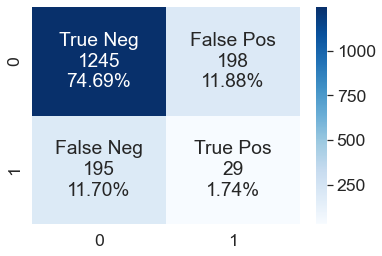



------------------------------------------------------------------------------------------------


              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1443
           1       0.13      0.13      0.13       224

    accuracy                           0.76      1667
   macro avg       0.50      0.50      0.50      1667
weighted avg       0.77      0.76      0.76      1667



CV balanced accuracy interval: [44.58, 58.50]


------------------------------------------------------------------------------------------------




In [38]:
report_dummy, result_dummy, cf_matrix_dummy = pipeline_report(model_dummy, X_train, y_train, X_test, y_test, 0.50, dummy = True)
metrics_dummy = conf_matrix(cf_matrix_dummy, plot = True)
classification_metrics(report_dummy, result_dummy)

* As we expected, the **baseline model Dummy Classifier** just reproduces the distribution of classes in our target value since it wasn't balanced.

\
Let's see now how our **two balanced Regression Models** fitted to the dataset:

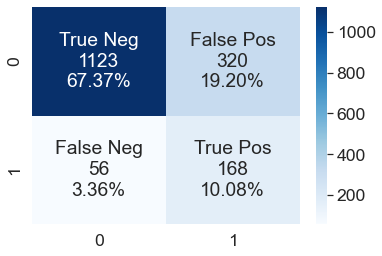



------------------------------------------------------------------------------------------------


              precision    recall  f1-score   support

           0       0.95      0.78      0.86      1443
           1       0.34      0.75      0.47       224

    accuracy                           0.77      1667
   macro avg       0.65      0.76      0.66      1667
weighted avg       0.87      0.77      0.80      1667



CV balanced accuracy interval: [71.09, 81.65]


------------------------------------------------------------------------------------------------


Best Threshold=0.528123, F-Score=0.489


Best Threshold=0.446934, G-Mean=0.783




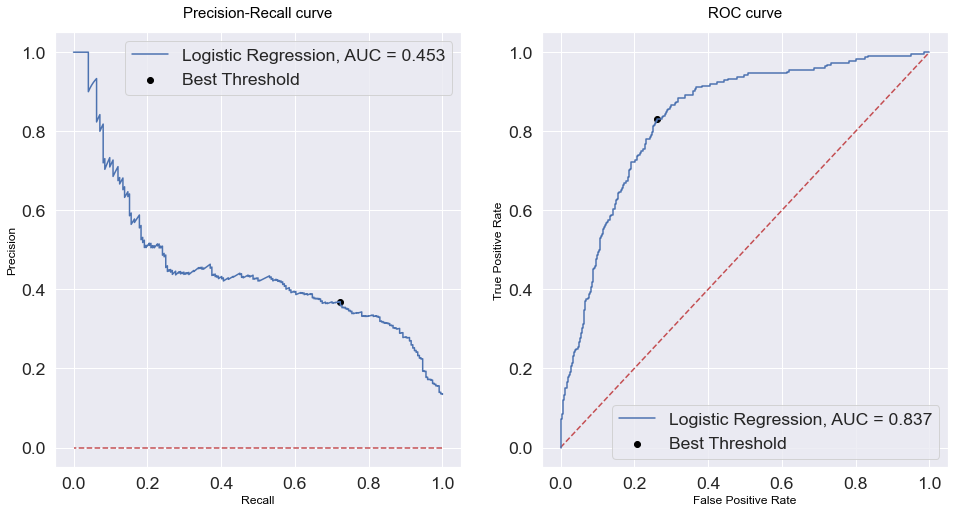

In [39]:
result_undersampling, report_undersampling, cf_matrix_undersampling = pipeline_report(model, X_train, y_train, X_test, 
                                                                                      y_test, 0.5, undersampling = True)
metrics_undersampling = conf_matrix(cf_matrix_undersampling, plot = True)
classification_metrics(report_undersampling, result_undersampling)
plot_AUC(model, X_train, X_test, y_train, y_test, undersampling = True)

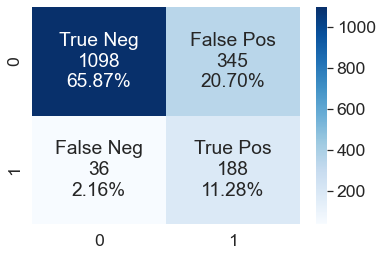



------------------------------------------------------------------------------------------------


              precision    recall  f1-score   support

           0       0.97      0.76      0.85      1443
           1       0.35      0.84      0.50       224

    accuracy                           0.77      1667
   macro avg       0.66      0.80      0.67      1667
weighted avg       0.89      0.77      0.80      1667



CV balanced accuracy interval: [70.44, 82.11]


------------------------------------------------------------------------------------------------


Best Threshold=0.552007, F-Score=0.515


Best Threshold=0.494254, G-Mean=0.802




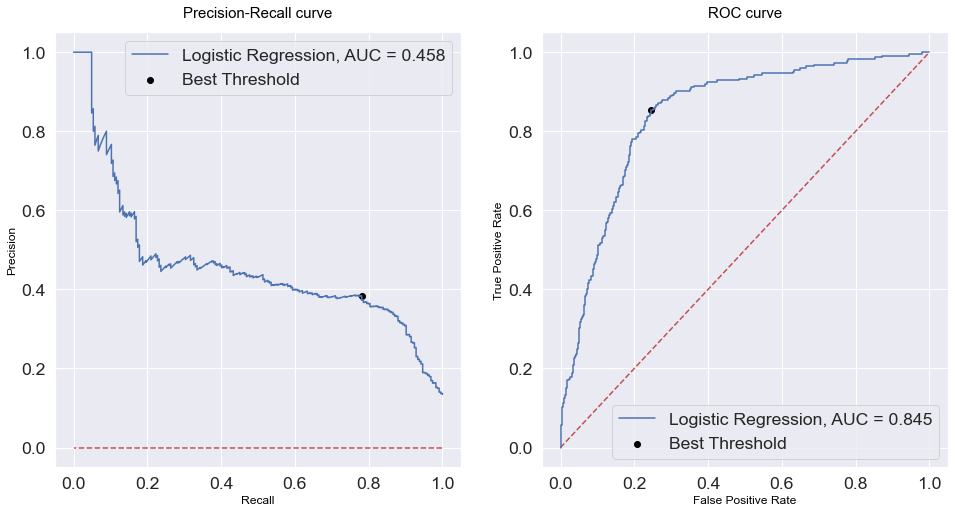

In [40]:
result_oversampling, report_oversampling, cf_matrix_oversampling = pipeline_report(model, X_train, y_train, X_test, 
                                                                                    y_test, 0.5, oversampling = True)
metrics_oversampling = conf_matrix(cf_matrix_oversampling, plot = True)
classification_metrics(report_oversampling, result_oversampling)
plot_AUC(model, X_train, X_test, y_train, y_test, oversampling = True)

* Both models presented a poor **Precision-Recall curve**, that means the trade-off between these two matrics varies more over the chosen threshold than in a perfect theoretical model. This can be observed by the low **Area under the curve**;
* Both models presented similar **Balanced accuracy**;
* The Oversampling model presented a better **ROC AUC** metric than the Undesampling;
* The **Recall** metric was higher in the Oversampling model.

Another interesting fact to note is that the best threshold to choose varies not only with the model but also with the metric evaluated. But how can we choose the best model and the best threshold?

The answer is in the business problem. 

In order to evaluate which balancing technique is more appropriate for our project we can create a **cost function**, so that we can bring in terms of monetary impact the qualitative results from the predictive models.

For the purposes of this project, we'll impose a penalty for the model errors (**False positives** and **False Negative**): for the false negative values, that is, when the model predicts a customer woudn't churn but he/she actually leaves the company, we'll establish a **penalty of R\\$27,00** (average revenue per user - ARPU - for Brazilian companys in this sector); for the false positive values, that is, when the model predicts a customer would churn but he/she actually didnt' churn, we'll impose a **penalty of R\\$7,00** (around 25% of discount, that would be granted for the customers to stay in the company).

In [41]:
def cost_function(y_true, y_pred):
    
    cf_matrix = confusion_matrix(y_true, y_pred)
    
    group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    
    group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
    
    metrics = dict(zip(group_names, group_counts))
    
    w = (- 27 * int(metrics['False Neg'])  -  7 * int(metrics['False Pos']))
    
    return w

\
We can now iterate it over a **range of threshold** values:

In [43]:
list_threshold = np.arange(0.05, 1.00, 0.05)

w_dummy = {}
w_undersampling = {}
w_oversampling = {}

for threshold in list_threshold:
    
    # Dummy
    
    model_trained = model_dummy.fit(X_train, y_train)
    
    y_pred = (model_trained.predict_proba(X_test)[:, 1] >= threshold).astype('float')
    
    w = cost_function(y_test, y_pred)
    
    w_dummy[threshold] = w
    
    
    # Undersampling
    
    undersampling = NearMiss(version = 2)
    scaler = RobustScaler()

    pipeline = Pipeline([('Balancing', undersampling), ('Standardization', scaler), ('Model', model)])
    
    model_trained = pipeline.fit(X_train, y_train)
        
    y_pred = (model_trained.predict_proba(X_test)[:, 1] >= threshold).astype('float')
    
    w = cost_function(y_test, y_pred)
    
    w_undersampling[threshold] = w
    
    
    # Oversampling
    
    oversampling = RandomOverSampler(random_state=53)
    scaler = RobustScaler()

    pipeline = Pipeline([('Balancing', oversampling), ('Standardization', scaler), ('Model', model)])

    model_trained = pipeline.fit(X_train, y_train)

    y_pred = (model_trained.predict_proba(X_test)[:, 1] >= threshold).astype('float') 
    
    w = cost_function(y_test, y_pred)
    
    w_oversampling[threshold] = w

\
Let's then print the respective results:

In [45]:
print(f"Dummy model - Minimum cost function: \033[1m{max(w_dummy.values())}\033[0m, Best threshold: \033[1m{max(w_dummy, key = w_dummy.get)}\033[0m")
print('\n')
print(f"Undersampling model - Minimum cost function: \033[1m{max(w_undersampling.values())}\033[0m, Best threshold: \033[1m{max(w_undersampling, key = w_undersampling.get)}\033[0m")
print('\n')
print(f"Oversampling model - Minimum cost function: \033[1m{max(w_oversampling.values())}\033[0m, Best threshold: \033[1m{max(w_oversampling, key = w_oversampling.get)}\033[0m")

Dummy model - Minimum cost function: -6651, Best threshold: 0.05


Undersampling model - Minimum cost function: -3671, Best threshold: 0.45


Oversampling model - Minimum cost function: -3318, Best threshold: 0.55


\
Therefore, we'll follow with the **Oversampling** model and a **0.55** threshold value.

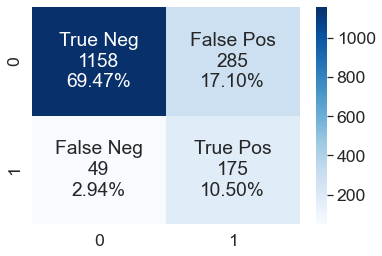



------------------------------------------------------------------------------------------------


              precision    recall  f1-score   support

           0       0.96      0.80      0.87      1443
           1       0.38      0.78      0.51       224

    accuracy                           0.80      1667
   macro avg       0.67      0.79      0.69      1667
weighted avg       0.88      0.80      0.83      1667



CV balanced accuracy interval: [70.62, 82.26]


------------------------------------------------------------------------------------------------




In [46]:
model = LogisticRegression(random_state = 53, max_iter = 1200)

result_oversampling, report_oversampling, cf_matrix_oversampling = pipeline_report(model, X_train, y_train, X_test, 
                                                                                    y_test, 0.55, oversampling = True)
metrics_oversampling = conf_matrix(cf_matrix_oversampling, plot = True)
classification_metrics(report_oversampling, result_oversampling)

## Feature Importance

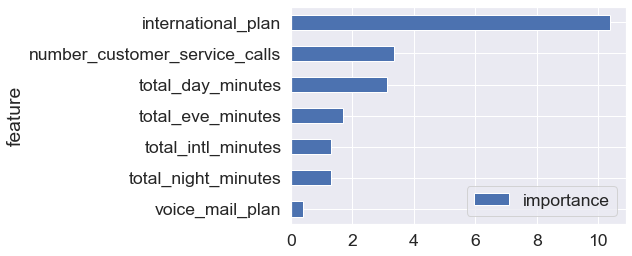

In [47]:
w = w1, w2, w3, w4, w5, w6, w7 = model.coef_[0]

feature_importance = pd.DataFrame(X_train.columns, columns = ["feature"])
feature_importance["importance"] = pow(math.e, w)
feature_importance = feature_importance.sort_values(by = ["importance"], ascending=True)

ax = feature_importance.plot.barh(x='feature', y='importance')
plt.show()

\
Since we have 4 features that represent similar information, we can try to condensate them into one new feature, and then reduce the dimensionality:

In [48]:
# Creating a new feature 'Total minutes':

df_train.insert(loc = 18, 
                value = df_train['total_day_minutes'] + df_train['total_eve_minutes'] + df_train['total_night_minutes'] + 
                df_train['total_intl_minutes'], column = 'total_minutes')
df_train.sample(5)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,total_minutes,number_customer_service_calls,use_customer_service_calls,churn
2619,MD,116,area_code_510,1,1,27,175.5,137,29.84,210.6,60,17.90,294.8,121,13.27,6.9,5,1.86,687.8,1,1,0
2794,VA,107,area_code_510,0,1,27,283.4,104,48.18,224.1,152,19.05,241.3,63,10.86,14.4,7,3.89,763.2,2,1,0
1404,KY,126,area_code_510,0,0,0,175.4,120,29.82,98.3,71,8.36,201.9,93,9.09,10.6,1,2.86,486.2,0,0,0
2897,SD,55,area_code_415,0,0,0,245.5,130,41.74,192.7,54,16.38,141.7,83,6.38,9.1,4,2.46,589.0,1,1,0
1915,UT,61,area_code_408,0,1,25,163.7,78,27.83,113.2,112,9.62,134.1,118,6.03,9.9,3,2.67,420.9,3,1,0


In [49]:
# Doing the same in the testing set:

df_test.insert(loc = 18, 
                value = df_test['total_day_minutes'] + df_test['total_eve_minutes'] + df_test['total_night_minutes'] + 
                df_test['total_intl_minutes'], column = 'total_minutes')
df_test.sample(5)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,total_minutes,number_customer_service_calls,churn
1541,IL,118,area_code_415,0,0,0,103.6,107,17.61,82.0,149,6.97,169.5,103,7.63,6.6,6,1.78,361.7,0,0
786,OR,175,area_code_415,0,0,0,185.0,104,31.45,325.8,86,27.69,85.4,105,3.84,14.6,2,3.94,610.8,1,0
1195,NV,25,area_code_415,0,0,0,250.1,108,42.52,221.9,97,18.86,208.5,84,9.38,11.1,3,3.00,691.6,2,0
526,IN,131,area_code_415,0,1,29,42.1,114,7.16,183.3,70,15.58,158.7,82,7.14,10.0,1,2.70,394.1,0,0
29,WY,115,area_code_415,1,1,6,140.1,125,23.82,157.9,100,13.42,249.4,96,11.22,10.1,3,2.73,557.5,1,0


\
We can now test our model with the new feature created, omitting the others:

In [50]:
X_train_2 = df_train.drop(columns = ['state', 'account_length', 'area_code', 'number_vmail_messages', 'total_day_calls',
                                  'total_day_charge', 'total_eve_calls', 'total_eve_charge', 'total_night_calls',
                                  'total_night_charge', 'total_intl_calls', 'total_intl_charge',
                                  'use_customer_service_calls', 'churn', 'total_day_minutes', 'total_eve_minutes',
                                   'total_night_minutes', 'total_intl_minutes'])

y_train_2 = df_train['churn']

X_test_2 = df_test.drop(columns = ['state', 'account_length', 'area_code', 'number_vmail_messages', 'total_day_calls',
                                  'total_day_charge', 'total_eve_calls', 'total_eve_charge', 'total_night_calls',
                                  'total_night_charge', 'total_intl_calls', 'total_intl_charge', 'churn', 
                                 'total_day_minutes', 'total_eve_minutes',
                                   'total_night_minutes', 'total_intl_minutes'])

y_test_2 = df_test['churn']

In [51]:
model_2 = LogisticRegression(random_state = 53, max_iter = 1200)

              precision    recall  f1-score   support

           0       0.95      0.80      0.87      1443
           1       0.36      0.73      0.48       224

    accuracy                           0.79      1667
   macro avg       0.66      0.76      0.68      1667
weighted avg       0.87      0.79      0.82      1667



CV balanced accuracy interval: [70.00, 80.24]


------------------------------------------------------------------------------------------------


Best Threshold=0.530445, F-Score=0.491


Best Threshold=0.492436, G-Mean=0.784




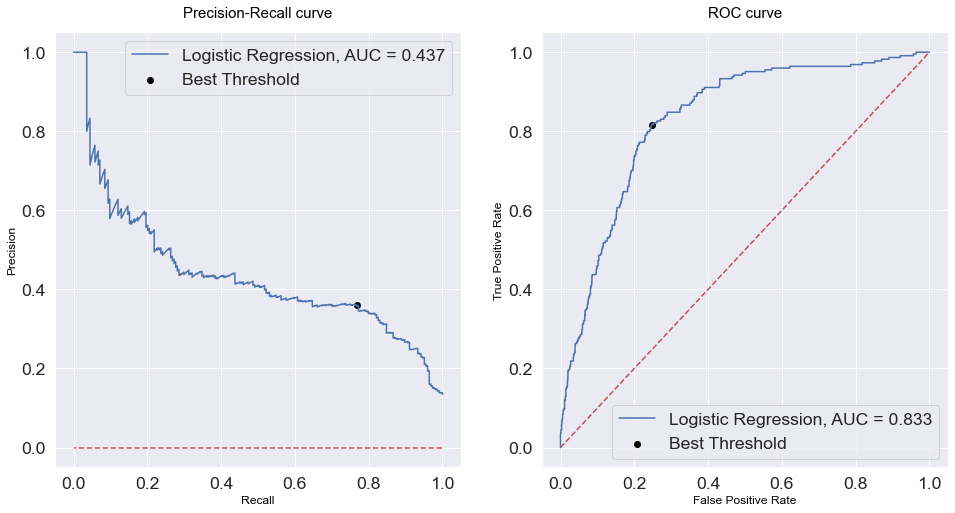

In [52]:
result_oversampling, report_oversampling, cf_matrix_oversampling = pipeline_report(model_2, X_train_2, y_train_2, X_test_2, 
                                                                                    y_test_2, 0.55, oversampling = True)
conf_matrix(cf_matrix_oversampling)
classification_metrics(report_oversampling, result_oversampling)
plot_AUC(model_2, X_train_2, X_test_2, y_train_2, y_test_2, oversampling = True)

In [53]:
list_threshold = np.arange(0.05, 1.00, 0.05)

w_oversampling_2 = {}

for threshold in list_threshold:
    
    oversampling = RandomOverSampler(random_state=53)
    scaler = RobustScaler()

    pipeline = Pipeline([('Balancing', oversampling), ('Standardization', scaler), ('Model', model_2)])

    model_trained = pipeline.fit(X_train_2, y_train_2)

    y_pred = (model_trained.predict_proba(X_test_2)[:, 1] >= threshold).astype('float') 
    
    w = cost_function(y_test, y_pred)
    
    w_oversampling_2[threshold] = w

In [54]:
print(f"Oversampling model - Minimum cost function: \033[1m{max(w_oversampling_2.values())}\033[0m, Best threshold: \033[1m{max(w_oversampling_2, key = w_oversampling_2.get)}\033[0m")

Oversampling model - Minimum cost function: -3623, Best threshold: 0.5


 \
 Let's finally calculate the feature importance for this final model:

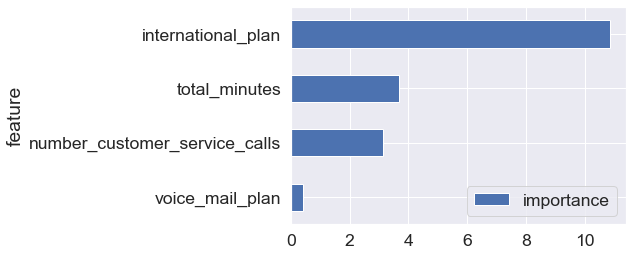

In [55]:
w = w1, w2, w3, w4 = model_2.coef_[0]

feature_importance = pd.DataFrame(X_train_2.columns, columns = ["feature"])
feature_importance["importance"] = pow(math.e, w)
feature_importance = feature_importance.sort_values(by = ["importance"], ascending=True)

ax = feature_importance.plot.barh(x='feature', y='importance')
plt.show()

We observe a **slight reduction in the quality of the model** even though we also **reduced its complexity**. Interesting to note that the feature created presented better response to the model than the feature `Number of customer service calls`.

We decided, however, to follow with the **previous model**.

## Model Tuning

Finally, we can try to improve the hyperparameters of the chosen model:

In [56]:
chosen_model = LogisticRegression(random_state = 53, max_iter = 1200, n_jobs = -1)

hiperparameters = {'Model__C': [0.10, 0.25, 0.5, 0.75, 1, 1.2, 1.5],
                   'Model__solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag'],
                   'Model__max_iter': [200, 300, 400, 500, 600, 700, 800, 1000, 1200, 1500]}

oversampling = RandomOverSampler(random_state=53)
scaler = RobustScaler()

pipeline = Pipeline([('Balancing', oversampling), ('Standardization', scaler), ('Model', chosen_model)])

custom_score = make_scorer(cost_function, greater_is_better=True, needs_proba = False)

cv = StratifiedKFold(n_splits = 10, shuffle=True)

otimiz_model = GridSearchCV(pipeline, hiperparameters, cv = cv, n_jobs = -1, verbose = 0,
                            scoring = custom_score)
otimiz_model.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('Balancing',
                                        RandomOverSampler(random_state=53)),
                                       ('Standardization', RobustScaler()),
                                       ('Model',
                                        LogisticRegression(max_iter=1200,
                                                           n_jobs=-1,
                                                           random_state=53))]),
             n_jobs=-1,
             param_grid={'Model__C': [0.1, 0.25, 0.5, 0.75, 1, 1.2, 1.5],
                         'Model__max_iter': [200, 300, 400, 500, 600, 700, 800,
                                             1000, 1200, 1500],
                         'Model__solver': ['lbfgs', 'liblinear', 'newton-cg',
                                           'sag']},
             scoring=make_scorer(cost_function))

In [61]:
# Printing the best parameters:

otimiz_model.best_params_

{'Model__C': 0.25, 'Model__max_iter': 200, 'Model__solver': 'lbfgs'}

In [57]:
final_model = LogisticRegression(random_state = 53, n_jobs = -1,
                                 max_iter = otimiz_model.best_params_['Model__max_iter'],
                                 C = otimiz_model.best_params_['Model__C'],
                                 solver = otimiz_model.best_params_['Model__solver'])

In [58]:
# Evaluating the final model:

oversampling = RandomOverSampler(random_state=53)
scaler = RobustScaler()

pipeline = Pipeline([('Balancing', oversampling), ('Standardization', scaler), ('Model', final_model)])

model_trained = pipeline.fit(X_train, y_train)

y_pred = (model_trained.predict_proba(X_test)[:, 1] >= 0.55).astype('float') 

w = cost_function(y_test, y_pred)

print(w)

-3318


We didn't verify an improvement in our cost function by tuning the hiperparameters, but we could **reduce its complexity**. 

## Final Considerations

In this project, we were able to explore and create insights from the dataset of a Telecom company. The company's main concern is to reduce the **churn** among the customers.

For this purpose, we created a machine learning model to predict the probability of a specific client to leave the company. As requested it was used the **Logistic Regression** model, and we were able to achieve **78% recall** metric and a **balanced accuray interval of 70.62-82.26**.

We also created a **cost function** that represents better our problem business and found the **threshold** that best fit to it.

In order to improve the model performance, the following strategies may be further studied:

* More feature combination and also feature engineering for the model training using the information from Feature Importance could be studied;
* Other oversampling and Undersampling techniques could be used;
* Study the impact of outliers on the model's performance.